# Alien Galaxy AILM Project

**Author:** Sevgi Muratova

**Student ID:** 304631

**Dataset:** `alien_galaxy.csv`  

The dataset “Alien Galaxy” contains information about different alien species colonizing planets across the galaxy. The goal of this project is to find out why some planets attract certain alien species more than others. This will help improve coexistence between species and make colonization strategies more effective.

Since we want to group planets based on their characteristics without predefined labels, this is a clustering problem.

To start, we use basic pandas functions to explore the CSV file and get a first look at how the data is organized.

---

## Importing the Dataset

We begin by importing the necessary libraries and loading the dataset using `pandas`. This will allow us to explore the structure and contents of the dataset before proceeding to cleaning and preprocessing.


In [137]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## EDA (missing values, histograms, outliers)

We begin our analysis by importing the dataset and displaying a few random rows. This helps us quickly see how the data is structured. We also check the overall size of the dataset using the shape function.

Next, we apply the describe() function to get basic summary statistics, which give us useful metrics about the features. Finally, the info() function is used to check data types and identify how many non-null values each column contains.

In [138]:
aliens=pd.read_csv("alien_galaxy.csv")
aliens.sample(5, random_state=7) 

Peace_Treaty_Accords  Technological_Advancements  Ammonia_Concentration  \
463                    0.0                         1.0                    0.0   
232                    0.0                         0.0                    2.0   
735                    NaN                         0.0                    1.0   
1420                   1.0                         0.0                    1.0   
637                    0.0                         0.0                    2.0   

      Precious_Metal_Trade_Tons  Food_Production_Tons  \
463                         8.0                   0.0   
232                         1.0                   1.0   
735                         5.0                   NaN   
1420                       27.0                  16.0   
637                        38.0                   NaN   

      Trade_Agreements_Signed  Last_Contact_Days Discovery_Date  \
463                       NaN               56.0     08-12-2029   
232                       3.0               70.0     23-06-2029   
735                       1.0               58.0            NaN   
1420                      1.0               27.0     03-04-2030   
637                       2.0               65.0     26-07-2029   

      Mineral_Extraction_Tons  Galactic_Visits  ...  Alien_Population_Count  \
463                      30.0              7.0  ...                 64014.0   
232                      23.0              8.0  ...                 17649.0   
735                       2.0              9.0  ...                 24367.0   
1420                     98.0              3.0  ...                 62551.0   
637                      92.0              4.0  ...                 65316.0   

      CO2_Concentration  Dominant_Species_Social_Structure  \
463                 4.0                           Together   
232                 8.0                            Married   
735                 7.0                             Single   
1420               10.0                           Divorced   
637                 3.0                                NaN   

      Hydrogen_Concentration  Colonization_Year  Species_Expansion_Response  \
463                   100.42             3076.0                         0.0   
232                    58.67             3106.0                         0.0   
735                    60.26             3112.0                         0.0   
1420                   74.68             3083.0                         0.0   
637                    96.28                NaN                         0.0   

      Galactic_Trade_Revenue  Alien_Civilization_Level  \
463                     11.0                       PhD   
232                     11.0                Graduation   
735                     11.0                     Basic   
1420                    11.0                Graduation   
637                     11.0                Graduation   

      Interstellar_Contact_Cost  Interplanetary_Communications  
463                         3.0                            8.0  
232                         3.0                            3.0  
735                         3.0                            1.0  
1420                        3.0                            6.0  
637                         NaN                            3.0  

[5 rows x 34 columns]

In [139]:
summary_stats=aliens.describe()
summary_stats.T

count          mean           std  \
Peace_Treaty_Accords                 2005.0      0.067332      0.250658   
Technological_Advancements           2028.0      0.066075      0.248474   
Ammonia_Concentration                2023.0      1.478992      1.007601   
Precious_Metal_Trade_Tons            2025.0     44.140741     52.559992   
Food_Production_Tons                 1994.0     26.177031     39.685028   
Trade_Agreements_Signed              2033.0      2.310379      1.890865   
Last_Contact_Days                    2006.0     48.879362     29.013427   
Mineral_Extraction_Tons              2032.0    164.693898    223.372040   
Galactic_Visits                      2020.0      5.332178      2.432660   
Sulfur_Concentration                 2031.0      1.984244      1.414822   
Exploration_Missions                 2018.0      2.662042      2.947694   
Biological_Research_Units            2031.0     37.798621     54.970546   
Offspring_Colonies                   2002.0      0.444555      0.539469   
Cultural_Exchange_Programs           2016.0      0.013393      0.114978   
Military_Engagements                 2020.0      0.072277      0.259011   
Inhabitants_Disputes                 2011.0      0.009448      0.096765   
Resource_Mining_Operations           2009.0      5.756098      3.236256   
Resource_Allocation_Credits          2040.0     26.719118     41.015351   
Young_Colonies                       2014.0      0.505958      0.543867   
HeavyMetals_Concentration            2030.0      2.991133      1.044557   
Terraforming_Initiatives             2010.0      0.074627      0.262854   
Planet_ID                            2024.0   5599.124506   3242.617953   
Liquid_Energy_Consumption_Terawatts  1992.0    302.908133    336.165200   
Alien_Population_Count               1999.0  52063.970985  25557.783034   
CO2_Concentration                    2048.0      5.443848      2.889391   
Hydrogen_Concentration               2009.0     59.833430     34.547631   
Colonization_Year                    1980.0   3098.669697     11.935272   
Species_Expansion_Response           2038.0      0.146222      0.353415   
Galactic_Trade_Revenue               1983.0     11.000000      0.000000   
Interstellar_Contact_Cost            2025.0      3.000000      0.000000   
Interplanetary_Communications        2016.0      4.092758      2.708653   

                                         min       25%       50%       75%  \
Peace_Treaty_Accords                    0.00      0.00      0.00      0.00   
Technological_Advancements              0.00      0.00      0.00      0.00   
Ammonia_Concentration                   0.00      1.00      1.00      2.00   
Precious_Metal_Trade_Tons               0.00      8.00     24.00     56.00   
Food_Production_Tons                    0.00      1.00      8.00     33.00   
Trade_Agreements_Signed                 0.00      1.00      2.00      3.00   
Last_Contact_Days                       0.00     24.00     49.00     74.00   
Mineral_Extraction_Tons                 0.00     16.00     67.00    226.50   
Galactic_Visits                         0.00      3.00      6.00      7.00   
Sulfur_Concentration                    0.00      1.00      2.00      3.00   
Exploration_Missions                    0.00      0.00      2.00      4.00   
Biological_Research_Units               0.00      3.00     12.00     50.00   
Offspring_Colonies                      0.00      0.00      0.00      1.00   
Cultural_Exchange_Programs              0.00      0.00      0.00      0.00   
Military_Engagements                    0.00      0.00      0.00      0.00   
Inhabitants_Disputes                    0.00      0.00      0.00      0.00   
Resource_Mining_Operations              0.00      3.00      5.00      8.00   
Resource_Allocation_Credits             0.00      1.00      8.00     32.00   
Young_Colonies                          0.00      0.00      0.00      1.00   
HeavyMetals_Concentration               0.00      2.00      3.00      4.00   

In [140]:
aliens.shape

(2240, 34)

In [141]:
aliens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Peace_Treaty_Accords                 2005 non-null   float64
 1   Technological_Advancements           2028 non-null   float64
 2   Ammonia_Concentration                2023 non-null   float64
 3   Precious_Metal_Trade_Tons            2025 non-null   float64
 4   Food_Production_Tons                 1994 non-null   float64
 5   Trade_Agreements_Signed              2033 non-null   float64
 6   Last_Contact_Days                    2006 non-null   float64
 7   Discovery_Date                       2014 non-null   object 
 8   Mineral_Extraction_Tons              2032 non-null   float64
 9   Galactic_Visits                      2020 non-null   float64
 10  Sulfur_Concentration                 2031 non-null   float64
 11  Exploration_Missions          

In [142]:
print(aliens.dtypes) 

Peace_Treaty_Accords                   float64
Technological_Advancements             float64
Ammonia_Concentration                  float64
Precious_Metal_Trade_Tons              float64
Food_Production_Tons                   float64
Trade_Agreements_Signed                float64
Last_Contact_Days                      float64
Discovery_Date                          object
Mineral_Extraction_Tons                float64
Galactic_Visits                        float64
Sulfur_Concentration                   float64
Exploration_Missions                   float64
Biological_Research_Units              float64
Offspring_Colonies                     float64
Cultural_Exchange_Programs             float64
Military_Engagements                   float64
Inhabitants_Disputes                   float64
Resource_Mining_Operations             float64
Resource_Allocation_Credits            float64
Young_Colonies                         float64
HeavyMetals_Concentration              float64
Terraforming_

We notice that the dataset is not very large, consisting of 2,240 rows and 34 columns. Most of the features are numerical, while only three are categorical (object type):

- Dominant_Species_Social_Structure

- Alien_Civilization_Level

- Discovery_Date

This means the majority of this analysis will focus on numeric variables, but we will also need to properly encode the categorical columns during preprocessing.

By looking at the features, we can already identify some that are likely to be critical for clustering planets:

- **Alien_Population_Count** → shows the scale of colonization.

- **Technological_Advancements** → may separate advanced civilizations from less developed ones.

- **Galactic_Trade_Revenue and Precious_Metal_Trade_Tons** → capture economic strength.

- **Cultural_Exchange_Programs and Peace_Treaty_Accords** → represent cooperation and diplomacy.

- **Military_Engagements and Inhabitants_Disputes** → represent conflict and instability.

These features, combined with environmental factors such as CO₂, Hydrogen, and Ammonia concentrations, are expected to influence how planets group together into clusters.

In addition, the **info()** output also shows that some columns contain missing values. Handling these will be an next step in data preprocessing before applying clustering algorithms.

We quickly check for duplicate rows in the dataset. Duplicates, if present, could bias the clustering results by overrepresenting certain planets. In our case, this step ensures that each observation is unique.

In [143]:
aliens[aliens.duplicated()]

Empty DataFrame
Columns: [Peace_Treaty_Accords, Technological_Advancements, Ammonia_Concentration, Precious_Metal_Trade_Tons, Food_Production_Tons, Trade_Agreements_Signed, Last_Contact_Days, Discovery_Date, Mineral_Extraction_Tons, Galactic_Visits, Sulfur_Concentration, Exploration_Missions, Biological_Research_Units, Offspring_Colonies, Cultural_Exchange_Programs, Military_Engagements, Inhabitants_Disputes, Resource_Mining_Operations, Resource_Allocation_Credits, Young_Colonies, HeavyMetals_Concentration, Terraforming_Initiatives, Planet_ID, Liquid_Energy_Consumption_Terawatts, Alien_Population_Count, CO2_Concentration, Dominant_Species_Social_Structure, Hydrogen_Concentration, Colonization_Year, Species_Expansion_Response, Galactic_Trade_Revenue, Alien_Civilization_Level, Interstellar_Contact_Cost, Interplanetary_Communications]
Index: []

[0 rows x 34 columns]

### Missing Values

Now we check for missing values in the dataset. Specifically, we calculate the percentage of null entries for each column relative to the total number of rows.

This helps to decide how to handle them:

If the percentage of missing values is small, we can remove those rows.

If the percentage is larger, it is better to keep the column and fill the missing values using an imputation method

In our analysis, we set a threshold of 5%. This means that if more than 5% of a column’s values are missing, we will not simply drop them, but instead apply an appropriate imputation strategy.

In [144]:
def check_missing_values(df):

    # Calculate missing values and percentages
    missing_count = df.isnull().sum()
    missing_percent = 100 * aliens.isnull().sum() / len(aliens)

    # Build a DataFrame
    summary = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing %': missing_percent.round(2)
    })

    # Keep only columns with missing values
    summary = summary[summary['Missing Count'] > 0].sort_values('Missing %', ascending=False)

    # Print a short report
    print(f"Dataset has {df.shape[1]} columns. {summary.shape[0]} contain missing values.")

    return summary

check_missing_values(aliens)


Dataset has 34 columns. 34 contain missing values.


Missing Count  Missing %
Colonization_Year                              260      11.61
Galactic_Trade_Revenue                         257      11.47
Liquid_Energy_Consumption_Terawatts            248      11.07
Food_Production_Tons                           246      10.98
Alien_Population_Count                         241      10.76
Offspring_Colonies                             238      10.62
Peace_Treaty_Accords                           235      10.49
Last_Contact_Days                              234      10.45
Dominant_Species_Social_Structure              233      10.40
Hydrogen_Concentration                         231      10.31
Resource_Mining_Operations                     231      10.31
Terraforming_Initiatives                       230      10.27
Inhabitants_Disputes                           229      10.22
Young_Colonies                                 226      10.09
Discovery_Date                                 226      10.09
Cultural_Exchange_Programs                     224      10.00
Interplanetary_Communications                  224      10.00
Exploration_Missions                           222       9.91
Alien_Civilization_Level                       222       9.91
Military_Engagements                           220       9.82
Galactic_Visits                                220       9.82
Ammonia_Concentration                          217       9.69
Planet_ID                                      216       9.64
Precious_Metal_Trade_Tons                      215       9.60
Interstellar_Contact_Cost                      215       9.60
Technological_Advancements                     212       9.46
HeavyMetals_Concentration                      210       9.38
Biological_Research_Units                      209       9.33
Sulfur_Concentration                           209       9.33
Mineral_Extraction_Tons                        208       9.29
Trade_Agreements_Signed                        207       9.24
Species_Expansion_Response                     202       9.02
Resource_Allocation_Credits                    200       8.93
CO2_Concentration                              192       8.57

To better understand the distribution of missing values, we can also use a visual approach.

<Figure size 700x400 with 0 Axes>

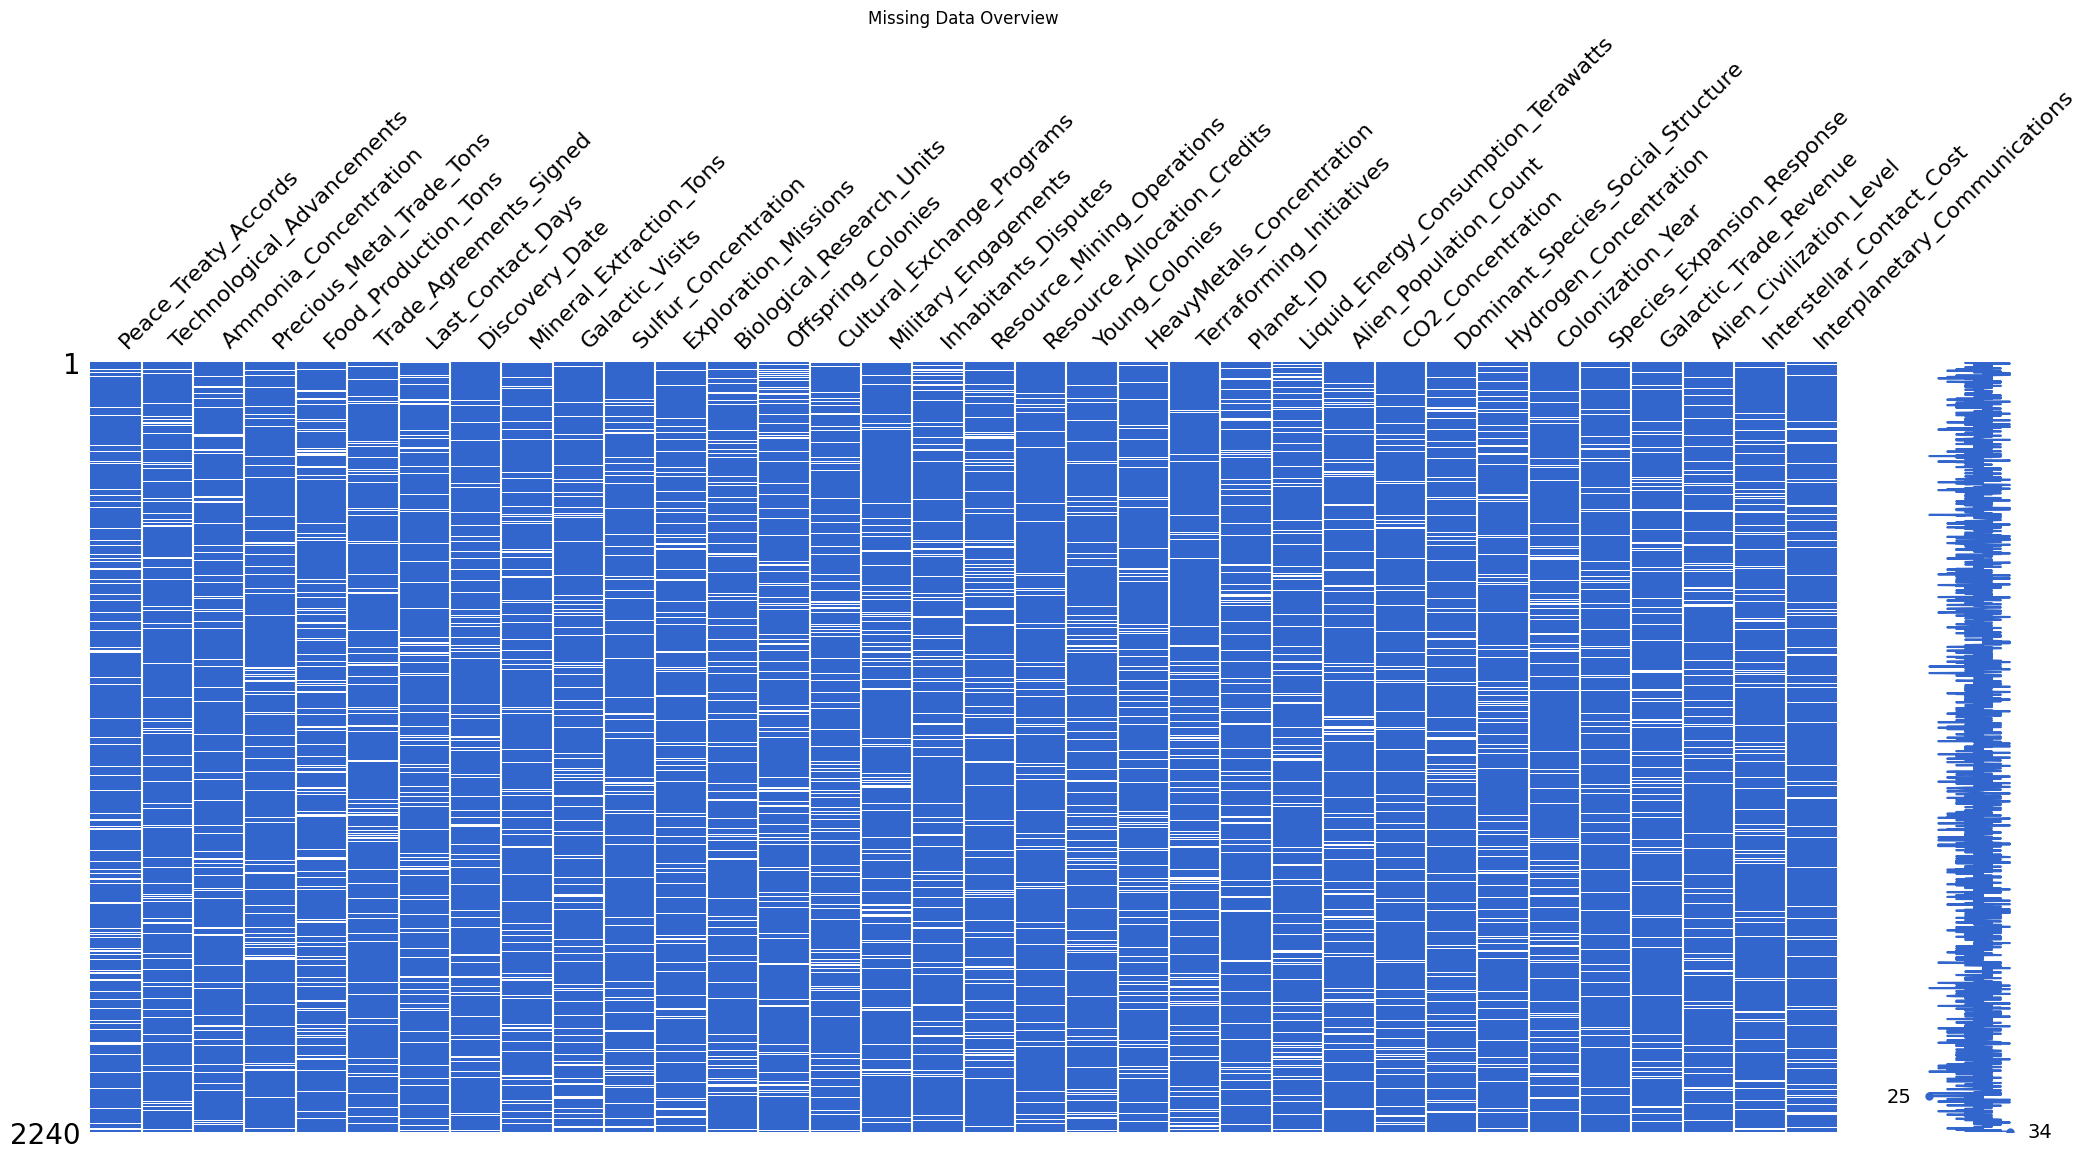

In [145]:
plt.figure(figsize=(7,4))
msno.matrix(aliens, color=(0.2, 0.4, 0.8)) 
plt.title('Missing Data Overview')
plt.show()

## Histograms

To explore the distribution of our variables, we plot histograms for each column in the dataset. This helps us see whether features are normally distributed, skewed, or have outliers.

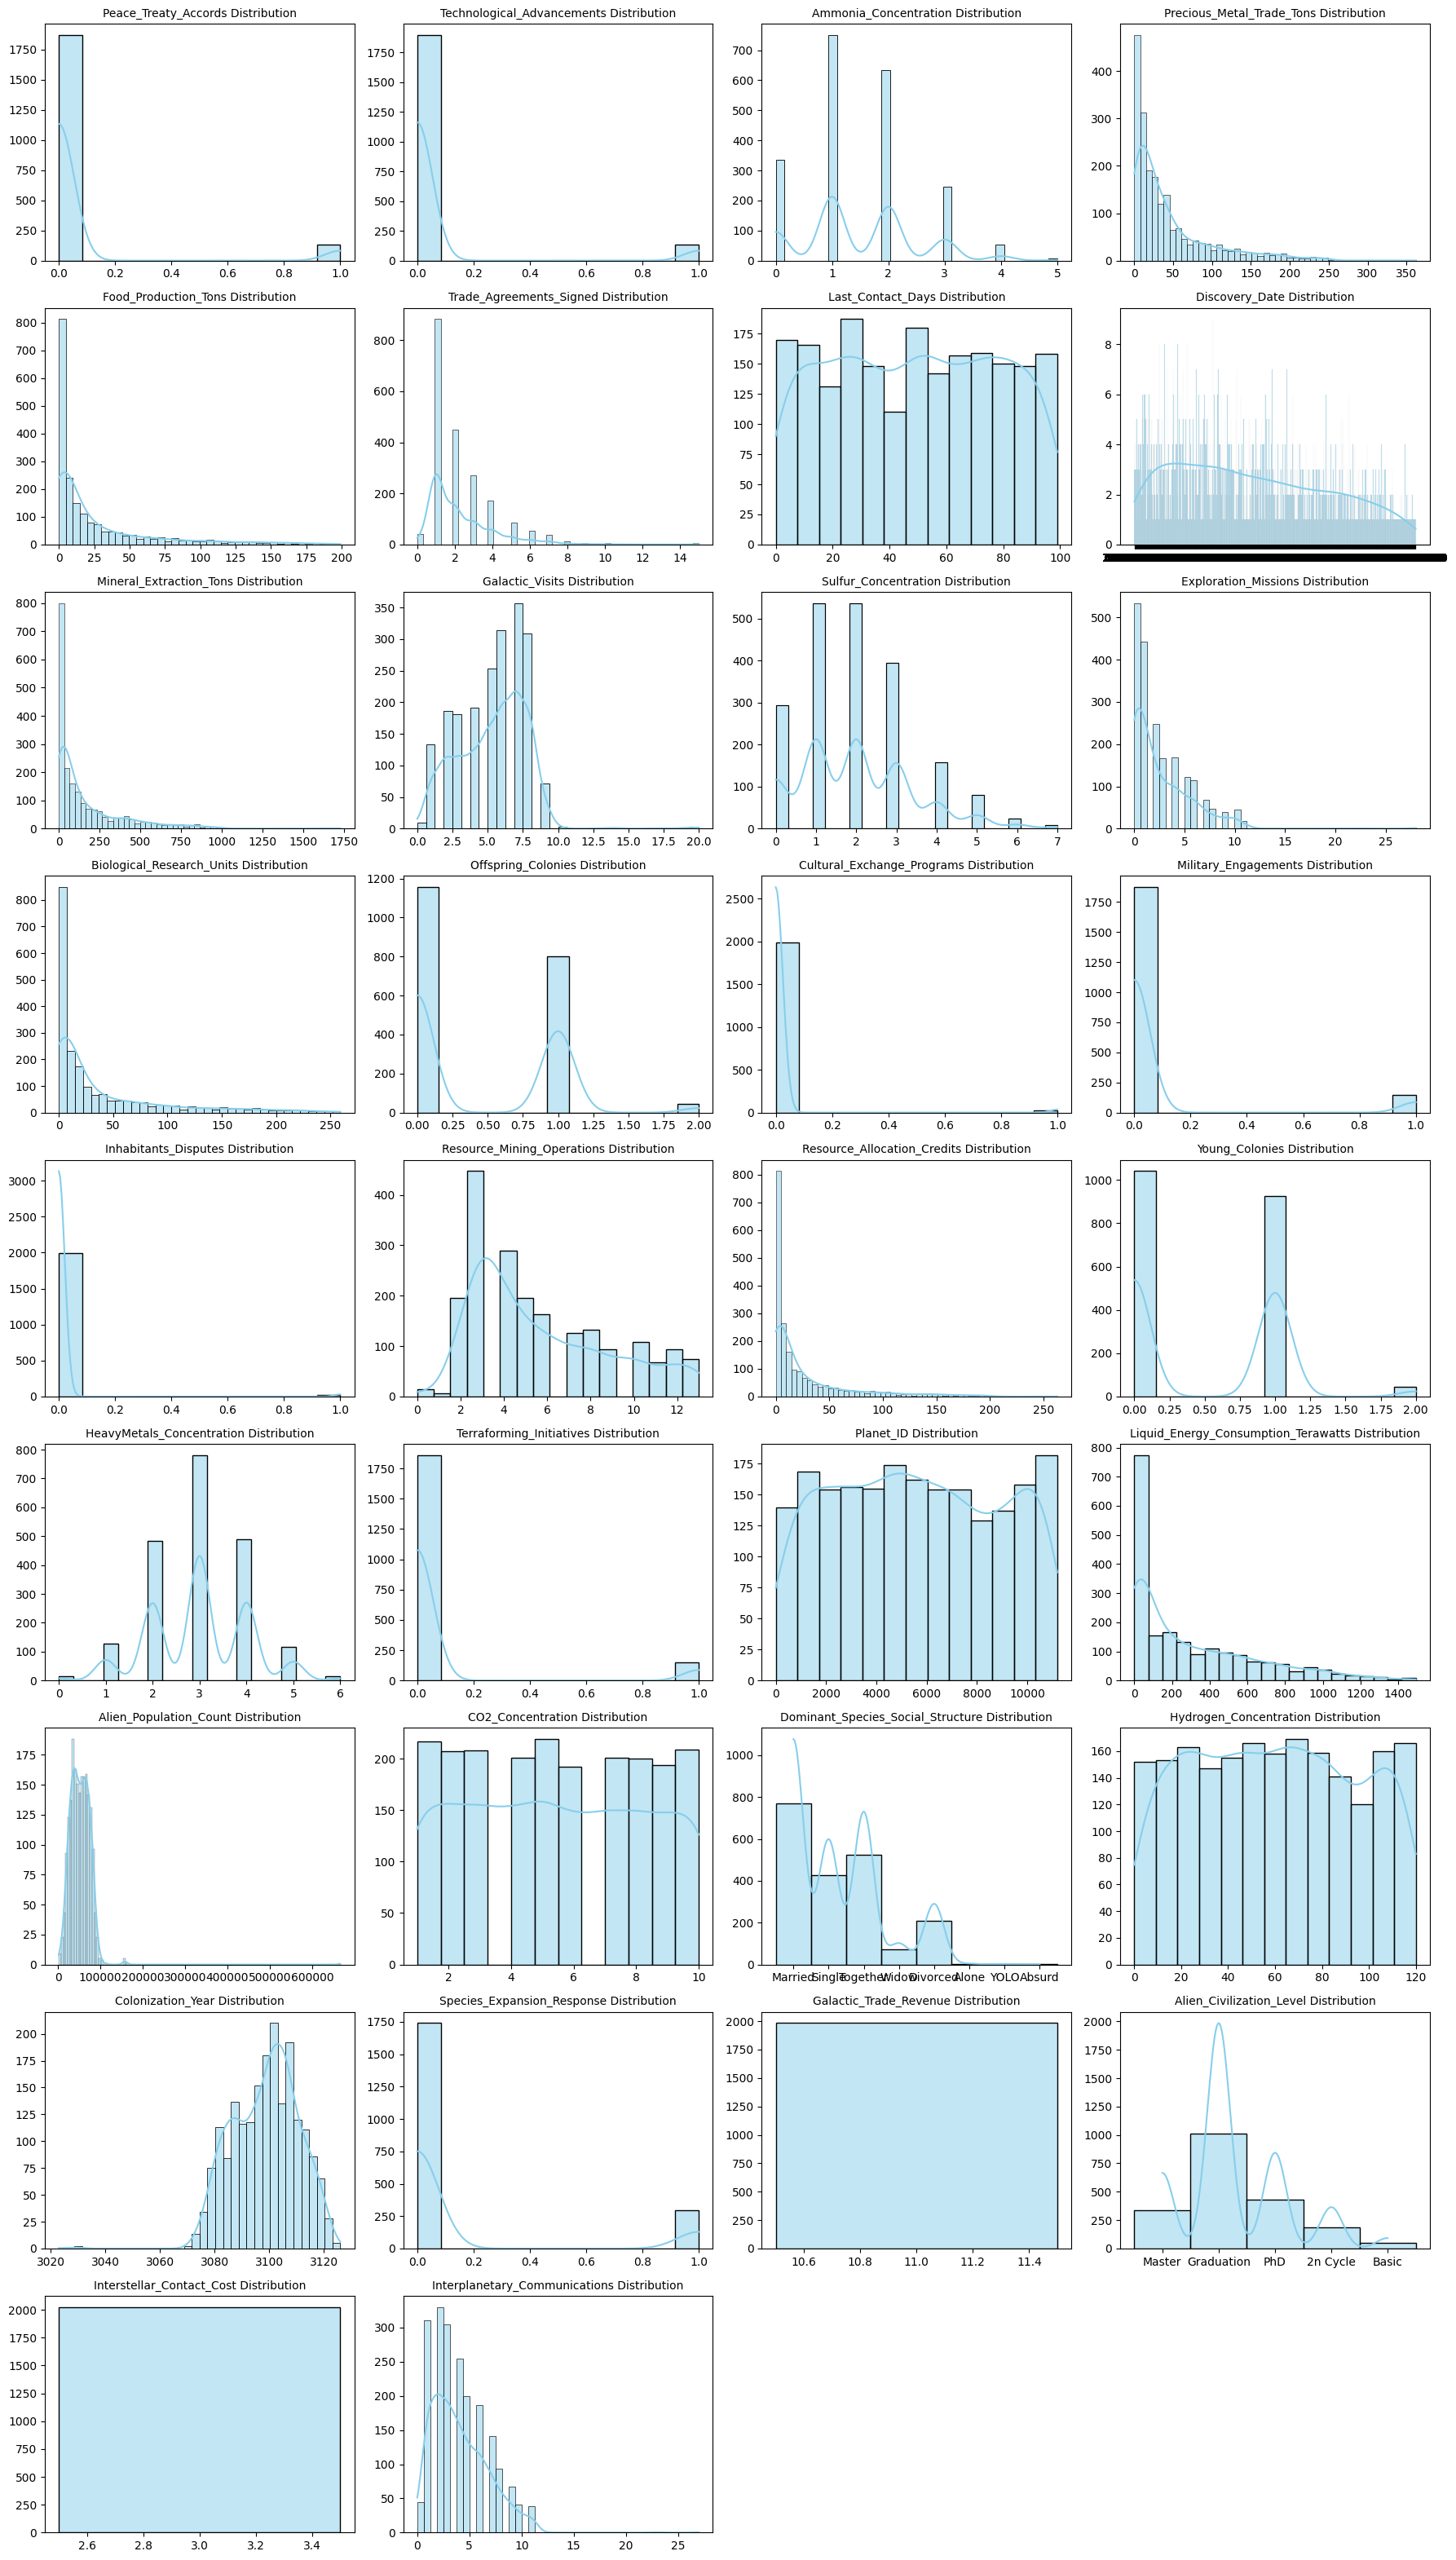

In [146]:
# Number of columns in the dataset
num_cols = len(aliens.columns)

# Arrange plots in a grid (4 plots per row)
cols_per_row = 4
rows = (num_cols // cols_per_row) + 1

fig, axs = plt.subplots(rows, cols_per_row, figsize=(18, rows * 3.5))
axs = axs.flatten()

# Loop through each column and plot histogram
for i, col in enumerate(aliens.columns):
    sns.histplot(data=aliens, x=col, kde=True, ax=axs[i], color="skyblue")
    axs[i].set_title(f"{col} Distribution", fontsize=10)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

### Analysis of Feature Distributions

The histograms above provide an overview of how the dataset’s variables are distributed. Several patterns are clear:

**Skewed Variables**
Many features (e.g., *Alien_Population_Count*, *Food_Production_Tons*, *Mineral_Extraction_Tons*) are heavily right-skewed. Most planets have small values, while a few show extremely large ones.

**Uniform-like Variables**
Some features, such as *Hydrogen_Concentration* and *CO2_Concentration*, are more evenly distributed without strong peaks, resembling uniform distributions.

**Outliers**
Features like *Mineral_Extraction_Tons*, *Galactic_Visits*, and *Alien_Population_Count* contain extreme values far from the bulk of the data. These may bias clustering and require special handling.

**Binary/Indicator Variables**
Columns such as *Peace_Treaty_Accords*, *Military_Engagements*, *Inhabitants_Disputes*, and *Terraforming_Initiatives* behave almost like binary indicators (0 vs. 1), reflecting presence or absence of certain conditions.

**Categorical Columns**
*Alien_Civilization_Level* is an ordinal categorical variable (Basic → 2n Cycle → Graduation → Master → PhD) and should be encoded numerically to preserve its order.

**Dominant_Species_Social_Structure** is a nominal categorical variable (e.g., Married, Single, YOLO, Absurd) with no natural order, so one-hot encoding is appropriate.

**Special Cases**
*Planet_ID* is simply an identifier and should be excluded.
*Galactic_Trade_Revenue* and *Interstellar_Contact_Cost* appear to be constant across the dataset, offering no useful information.
*Discovery_Date* is stored as text, which explains its irregular plot. It should either be converted to a usable datetime feature or dropped.

### Decision to drop irrelevant or constant columns

After exploring the dataset, we identified a few columns that do not contribute to clustering:

In [147]:
aliens_clean = aliens.copy()

columns_to_drop = ['Planet_ID', 'Galactic_Trade_Revenue', 'Interstellar_Contact_Cost']
aliens_clean.drop(columns=[c for c in columns_to_drop if c in aliens_clean.columns], inplace=True)

print("Shape after dropping constants/ID:", aliens_clean.shape)

Shape after dropping constants/ID: (2240, 31)


### Handling the Categorical Variables  

The dataset contains two categorical columns:  

- **Alien_Civilization_Level** - this variable has an **inherent order** (from "Basic" to "PhD"). To preserve this order, we applied **ordinal encoding** by mapping each level to a numeric scale (Basic = 0, …, PhD = 4).  

- **Dominant_Species_Social_Structure**  represents social status categories such as "Married", "Single", "Widow", etc. Since there is **no logical order** between these values, we applied **One-Hot Encoding** to transform them into binary features.  

For missing values (`NaN`), we created a separate indicator column to mark their presence, ensuring no information is lost.


In [148]:
def_raw = pd.read_csv("alien_galaxy.csv")
print(def_raw['Dominant_Species_Social_Structure'].unique())

['Married' 'Single' 'Together' 'Widow' nan 'Divorced' 'Alone' 'YOLO'
 'Absurd']


In [149]:
# Reload the original values for this column
aliens['Alien_Civilization_Level'] = pd.read_csv("alien_galaxy.csv")['Alien_Civilization_Level']

# Define mapping
civilization_mapping = {
    "Basic": 0,
    "2n Cycle": 1,
    "Graduation": 2,
    "Master": 3,
    "PhD": 4
}

# Apply mapping
aliens['Alien_Civilization_Level'] = aliens['Alien_Civilization_Level'].map(civilization_mapping)

print(aliens['Alien_Civilization_Level'].head())


0    3.0
1    3.0
2    2.0
3    3.0
4    2.0
Name: Alien_Civilization_Level, dtype: float64


## Detecting and Handling Outliers

Outliers were identified using the Interquartile Range (IQR) method, which detects values that deviate strongly from the central distribution of a variable.

We set the cutoff at 4 × IQR instead of the common 1.5 × IQR. The reason is that a stricter threshold would eliminate too many observations, including potentially informative ones. With 4 × IQR, only the most extreme anomalies are flagged.

Binary variables (columns with only two unique categories) were excluded from the analysis, since the outlier concept doesn’t apply to them.

Detected rows were removed rather than imputed, as keeping them could bias our analysis and models. Replacing outliers with the mean/median was tested, but it introduced distortions in the feature distributions, so removal was considered the most reliable option.

After this step, approximately 4% of the dataset was dropped, which was acceptable given the size of the dataset.

In [150]:
def find_outliers_iqr(dataframe, features):
    flagged = {}
    for feature in features:
        q1 = dataframe[feature].quantile(0.25)
        q3 = dataframe[feature].quantile(0.75)
        iqr = q3 - q1
        lower_lim = q1 - (4 * iqr)
        upper_lim = q3 + (4 * iqr)

        mask = (dataframe[feature] < lower_lim) | (dataframe[feature] > upper_lim)
        flagged[feature] = dataframe[mask].index.tolist()
    return flagged

# numeric features only
num_features = aliens.select_dtypes(include=['int64', 'float64']).columns

# drop binary features
non_binary_features = [f for f in num_features if aliens[f].nunique() > 2]

outliers_found = find_outliers_iqr(aliens, non_binary_features)

for feat, idxs in outliers_found.items():
    print(f"{feat}: {len(idxs)} rows flagged as outliers")


Ammonia_Concentration: 0 rows flagged as outliers
Precious_Metal_Trade_Tons: 4 rows flagged as outliers
Food_Production_Tons: 32 rows flagged as outliers
Trade_Agreements_Signed: 10 rows flagged as outliers
Last_Contact_Days: 0 rows flagged as outliers
Mineral_Extraction_Tons: 5 rows flagged as outliers
Galactic_Visits: 0 rows flagged as outliers
Sulfur_Concentration: 0 rows flagged as outliers
Exploration_Missions: 4 rows flagged as outliers
Biological_Research_Units: 13 rows flagged as outliers
Offspring_Colonies: 0 rows flagged as outliers
Resource_Mining_Operations: 0 rows flagged as outliers
Resource_Allocation_Credits: 46 rows flagged as outliers
Young_Colonies: 0 rows flagged as outliers
HeavyMetals_Concentration: 0 rows flagged as outliers
Planet_ID: 0 rows flagged as outliers
Liquid_Energy_Consumption_Terawatts: 0 rows flagged as outliers
Alien_Population_Count: 1 rows flagged as outliers
CO2_Concentration: 0 rows flagged as outliers
Hydrogen_Concentration: 0 rows flagged as o

Bbefore applying the outlier removal procedure, we generated horizontal boxplots for all numeric variables (excluding binary ones).
This visualization helps highlight extreme values and skewness in the dataset. We also restricted the x-axis range to better focus on the majority of the data distribution.

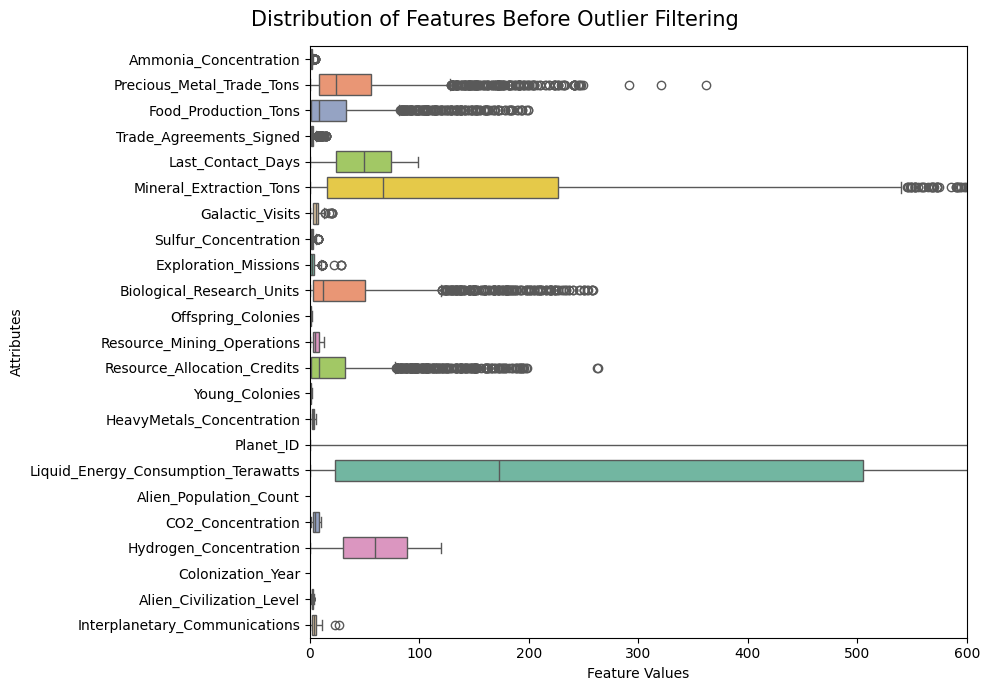

In [151]:
plt.figure(figsize=(10, 7))
plt.suptitle("Distribution of Features Before Outlier Filtering", fontsize=15)

sns.boxplot(
    data=aliens[non_binary_features],
    orient="h",
    palette="Set2"
)

plt.xlabel("Feature Values")
plt.ylabel("Attributes")
plt.xlim(0, 600)
plt.tight_layout()
plt.show()


## Outliers Removed – Boxplot Visualization

Once the most extreme values were filtered out, we re-plotted the boxplots to confirm that the distributions looked cleaner and less skewed.
This comparison before vs. after shows the effect of our outlier removal step.

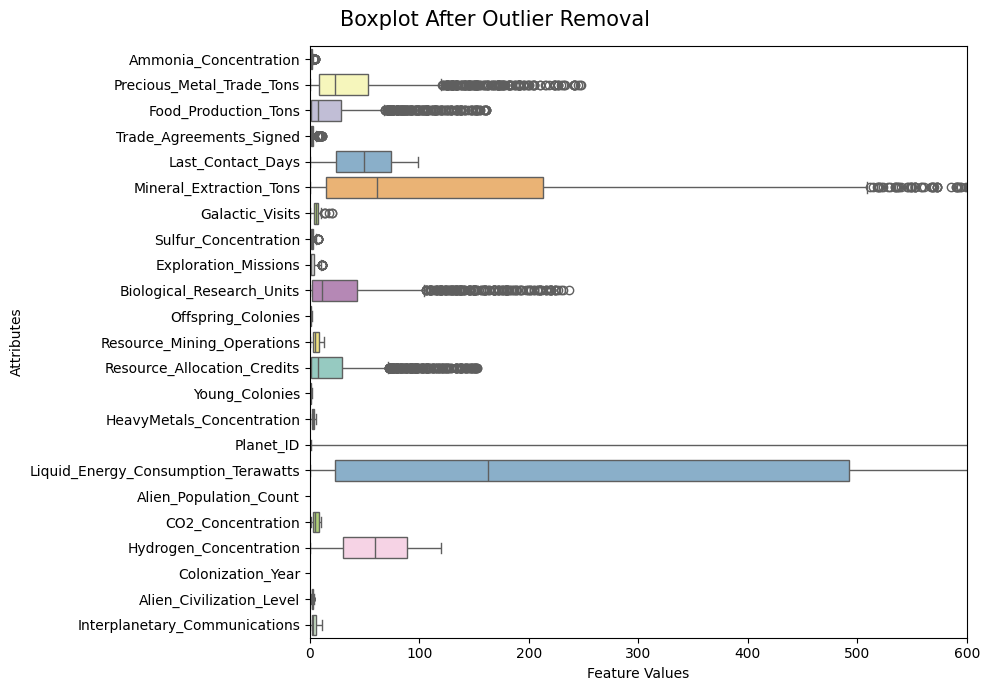

In [152]:
# Drop rows with outliers detected earlier
for feature, idxs in outliers_found.items(): 
    aliens.drop(index=idxs, inplace=True, errors="ignore")

# Replot the boxplots after filtering
plt.figure(figsize=(10, 7))
plt.suptitle("Boxplot After Outlier Removal", fontsize=15)

sns.boxplot(
    data=aliens[non_binary_features],
    orient="h",
    palette="Set3"          
)

plt.xlabel("Feature Values")
plt.ylabel("Attributes")
plt.xlim(0, 600)
plt.tight_layout()
plt.show()


### Checking for Remaining Outliers

After removing rows flagged in the first pass, we re-applied the IQR procedure to verify whether any additional anomalies persisted.
This step ensures that the dataset is not dominated by extreme values that could bias our results.

The number of leftover outliers was relatively small (about 5% of the dataset), which we considered acceptable.

In [153]:
# Re-run IQR check on the cleaned dataset
leftover_outliers = find_outliers_iqr(aliens, non_binary_features)

total_left = 0
for feature, idxs in leftover_outliers.items():
    print(f"Feature: {feature} | Remaining outliers: {len(idxs)}")
    total_left += len(idxs)

print(f"Total remaining outliers across all features: {total_left}")


Feature: Ammonia_Concentration | Remaining outliers: 0
Feature: Precious_Metal_Trade_Tons | Remaining outliers: 9
Feature: Food_Production_Tons | Remaining outliers: 38
Feature: Trade_Agreements_Signed | Remaining outliers: 0
Feature: Last_Contact_Days | Remaining outliers: 0
Feature: Mineral_Extraction_Tons | Remaining outliers: 0
Feature: Galactic_Visits | Remaining outliers: 2
Feature: Sulfur_Concentration | Remaining outliers: 0
Feature: Exploration_Missions | Remaining outliers: 0
Feature: Biological_Research_Units | Remaining outliers: 26
Feature: Offspring_Colonies | Remaining outliers: 0
Feature: Resource_Mining_Operations | Remaining outliers: 0
Feature: Resource_Allocation_Credits | Remaining outliers: 22
Feature: Young_Colonies | Remaining outliers: 0
Feature: HeavyMetals_Concentration | Remaining outliers: 0
Feature: Planet_ID | Remaining outliers: 0
Feature: Liquid_Energy_Consumption_Terawatts | Remaining outliers: 0
Feature: Alien_Population_Count | Remaining outliers: 0


In [154]:
print(f"Dataset now has {aliens.shape[0]} rows and {aliens.shape[1]} columns")


Dataset now has 2140 rows and 34 columns


### Scaling the Features

Before clustering, it is important to ensure that the dataset is both complete (no missing values) and scaled
We considered different imputation strategies:  

- **Mean imputation** was not suitable for skewed variables, as it distorted their distributions.  
- **Median imputation** was more robust but ignored relationships between features.  
- **Mode imputation** could be used for categorical features, but would be misleading for continuous variables.  

In the end, we adopted the **median strategy** for numerical features, as it preserves the overall distribution while avoiding the distortion caused by extreme outliers.  

We tested different scalers:  
- **MinMaxScaler** amplified the effect of outliers.  
- **RobustScaler** reduced the effect of outliers but compressed the natural spread of normally distributed features.  
- **StandardScaler** provided the best compromise, standardizing each feature to mean = 0 and variance = 1 while maintaining relationships between variables.  

We built a preprocessing pipeline combining **median imputation** and **StandardScaler**. This pipeline ensures that missing values are handled consistently and that all features contribute equally to clustering. The resulting scaled dataset was stored in a new DataFrame called `X_scaled_df`, which we used for subsequent dimensionality reduction and clustering.

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Keeps only numeric columns
num_cols = aliens.select_dtypes(include=['number']).columns
X = aliens[num_cols]

# Pipeline
preprocess = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

X_scaled = preprocess.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=num_cols, index=aliens.index)

print("Scaled shape:", X_scaled_df.shape)
X_scaled_df.head()



Scaled shape: (2140, 32)


Peace_Treaty_Accords  Technological_Advancements  Ammonia_Concentration  \
0             -0.256392                    -0.23721              -0.448409   
1             -0.256392                    -0.23721               0.584525   
2             -0.256392                    -0.23721              -0.448409   
3             -0.256392                    -0.23721              -0.448409   
4             -0.256392                    -0.23721              -1.481344   

   Precious_Metal_Trade_Tons  Food_Production_Tons  Trade_Agreements_Signed  \
0                   0.000550              2.643400                -0.777679   
1                   1.429417              0.858090                -0.777679   
2                   2.543093              0.981215                -0.163797   
3                   1.408404             -0.434720                 0.450084   
4                  -0.230590              1.165902                 2.905610   

   Last_Contact_Days  Mineral_Extraction_Tons  Galactic_Visits  \
0          -1.315832                 1.264487        -1.126651   
1           0.000376                -0.422174        -1.579427   
2           0.439112                 1.121376        -0.221099   
3           0.000376                -0.463063         0.684454   
4          -0.913658                 0.170713        -1.126651   

   Sulfur_Concentration  ...  Liquid_Energy_Consumption_Terawatts  \
0             -1.471958  ...                             1.147035   
1              0.754184  ...                             0.940296   
2              0.012136  ...                             1.394495   
3              0.012136  ...                             0.103943   
4              0.012136  ...                             0.028765   

   Alien_Population_Count  CO2_Concentration  Hydrogen_Concentration  \
0                1.420735           1.667490                1.185243   
1                0.625486           1.667490                0.199160   
2                0.945575          -0.147950               -1.060784   
3               -0.347338          -0.147950               -0.467725   
4                0.378653           0.941314                0.943853   

   Colonization_Year  Species_Expansion_Response  Galactic_Trade_Revenue  \
0           1.718108                   -0.387992                     0.0   
1           0.020459                   -0.387992                     0.0   
2           0.109809                   -0.387992                     0.0   
3          -0.068891                    2.577374                     0.0   
4          -0.873041                   -0.387992                     0.0   

   Alien_Civilization_Level  Interstellar_Contact_Cost  \
0                  0.598416                        0.0   
1                  0.598416                        0.0   
2                 -0.438515                        0.0   
3                  0.598416                        0.0   
4                 -0.438515                        0.0   

   Interplanetary_Communications  
0                       0.824979  
1                       0.426096  
2                       1.622744  
3                       1.223861  
4                       0.027213  

[5 rows x 32 columns]

### Validating Scaling After Imputation

Once missing values were imputed and features re-scaled, we checked the statistical properties of each column.

In [156]:
# We verify that the dataset is standardized after preprocessing
print("\nDataset statistics after preprocessing:\n")

# Quick overview
print("Column means:\n", X_scaled_df.mean())
print("\nColumn standard deviations:\n", X_scaled_df.std())

# Detailed per-feature validation
for feature in X_scaled_df.columns:
    mu = X_scaled_df[feature].mean()
    sigma = X_scaled_df[feature].std()
    print(f"{feature:25s} | mean = {mu: .5f}, std = {sigma: .5f}")




Dataset statistics after preprocessing:

Column means:
 Peace_Treaty_Accords                  -1.660147e-18
Technological_Advancements            -2.822249e-17
Ammonia_Concentration                  4.150366e-19
Precious_Metal_Trade_Tons             -5.893520e-17
Food_Production_Tons                  -9.960879e-18
Trade_Agreements_Signed               -1.128900e-16
Last_Contact_Days                      1.162103e-17
Mineral_Extraction_Tons               -8.134718e-17
Galactic_Visits                       -1.859364e-16
Sulfur_Concentration                   9.296821e-17
Exploration_Missions                  -2.158191e-17
Biological_Research_Units              1.992176e-17
Offspring_Colonies                    -6.640586e-17
Cultural_Exchange_Programs            -4.150366e-17
Military_Engagements                   8.217726e-17
Inhabitants_Disputes                  -2.324205e-17
Resource_Mining_Operations             2.822249e-17
Resource_Allocation_Credits            2.573227e-17
Young_C

### Feature Distribution Overview

To get a quick sense of each variable’s shape, we plotted per-feature histograms in a grid layout. This helps spot skewed variables, multi-modal patterns, and near-constant (low-variance) features.

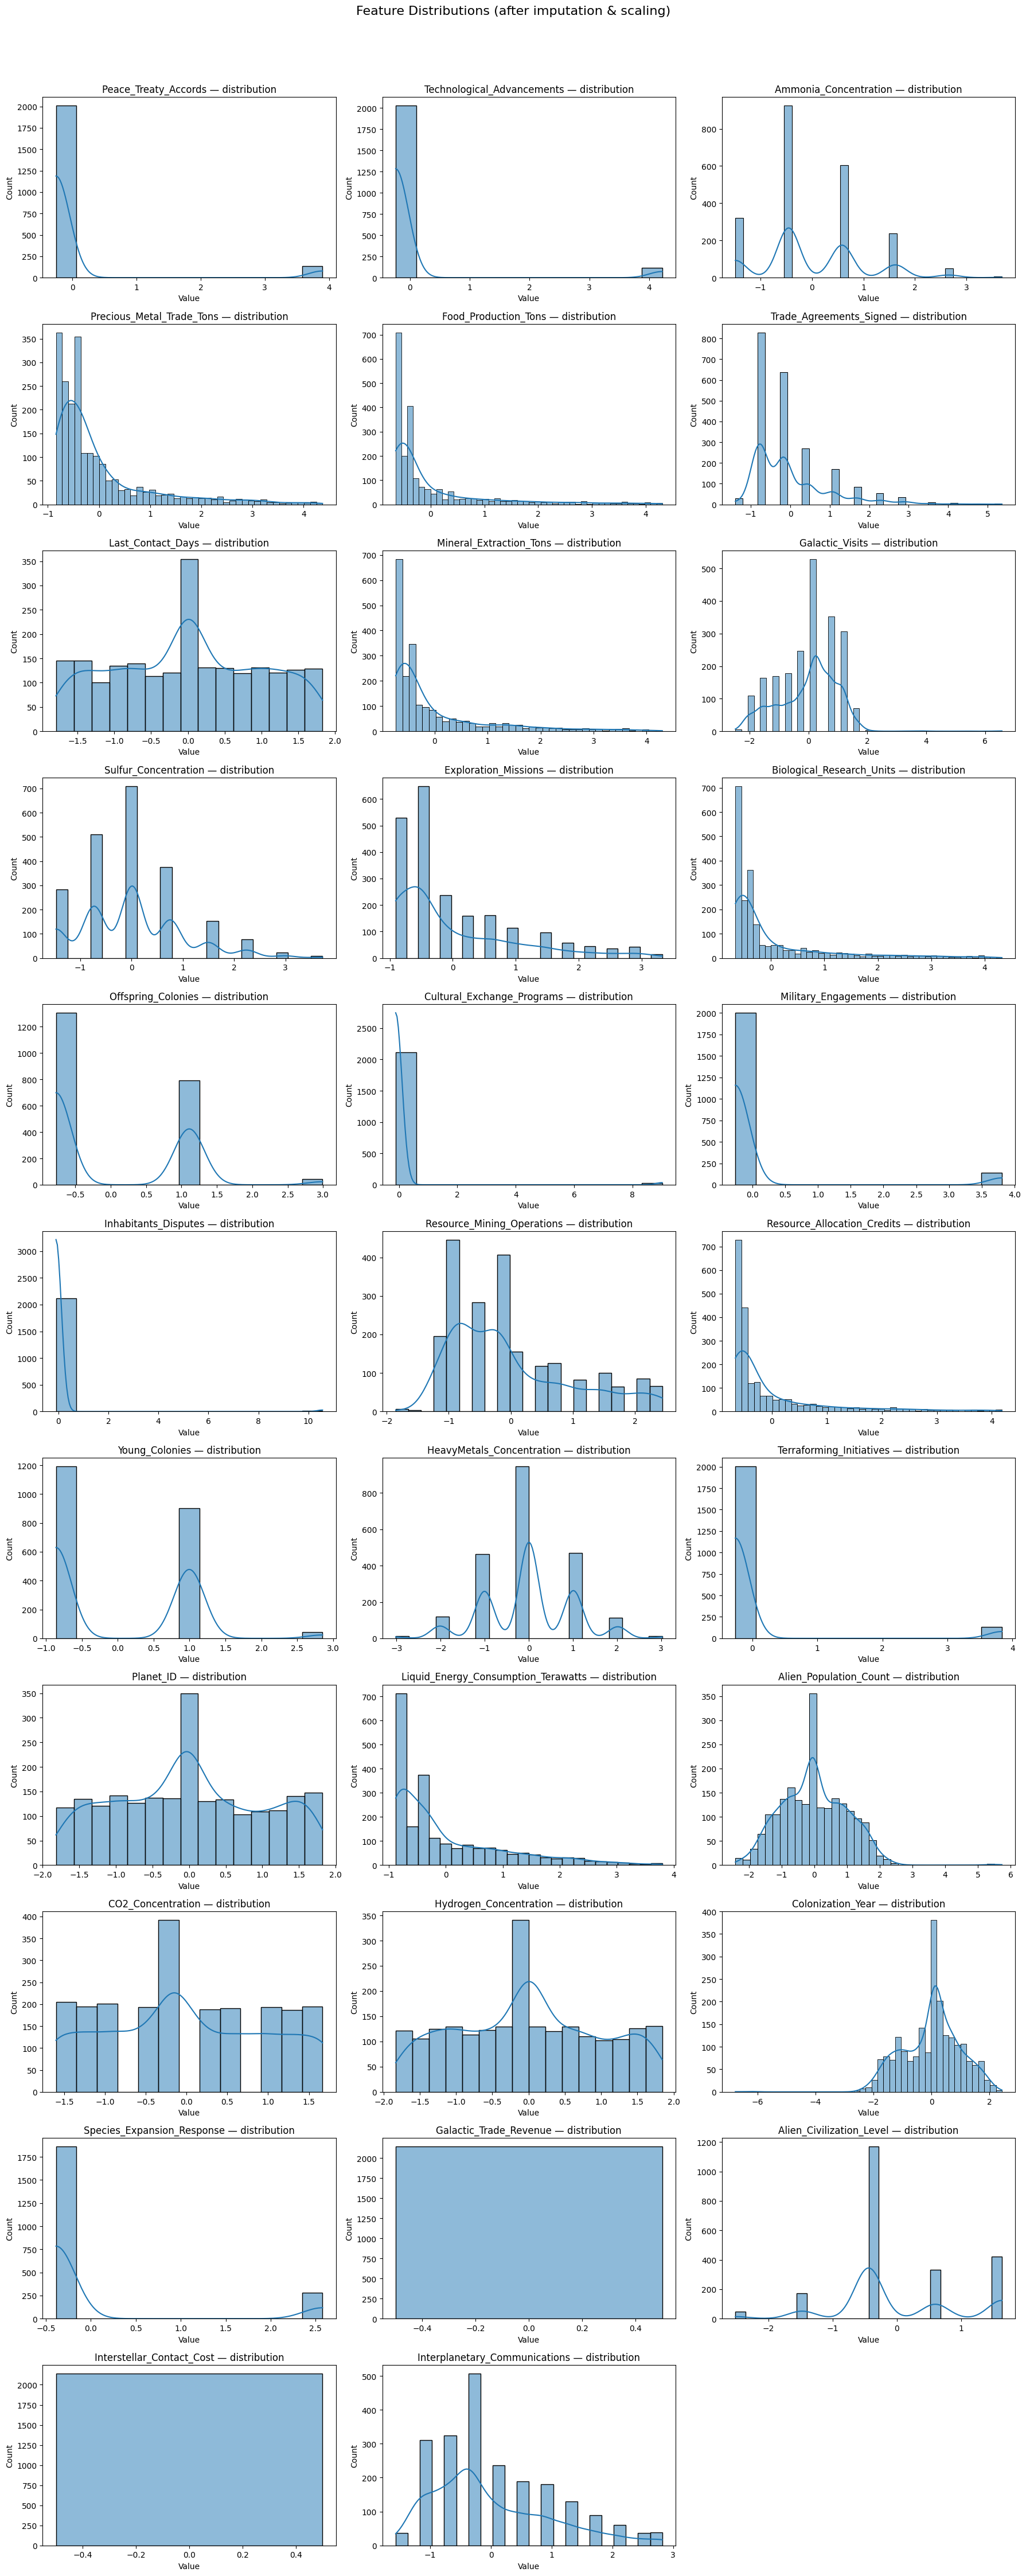

In [ ]:
def plot_feature_distributions(df, columns=None, cols_per_row=3, bins="auto"):

    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns.tolist()
    else:
        columns = [c for c in columns if np.issubdtype(df[c].dtype, np.number)]
    
    n = len(columns)
    if n == 0:
        print("No numeric columns to plot.")
        return
    
    rows = math.ceil(n / cols_per_row)
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4 * rows), sharex=False, sharey=False)
    axes = np.ravel(axes)
    
    for i, col in enumerate(columns):
        ax = axes[i]
        sns.histplot(df[col], kde=True, bins=bins, ax=ax)
        ax.set_title(f"{col} — distribution")
        ax.set_xlabel("Value")
        ax.set_ylabel("Count")
        ax.grid(False)
    
    # turn off any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")
    
    plt.suptitle("Feature Distributions (after imputation & scaling)", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


plot_feature_distributions(X_scaled_df, cols_per_row=3, bins="auto")


### Verifying Missing Data Imputation

To confirm that all missing values were handled correctly, we used missingno to visualize the dataset after preprocessing.
The absence of visible gaps in the plot confirms that the imputation was successful.

<Figure size 800x400 with 0 Axes>

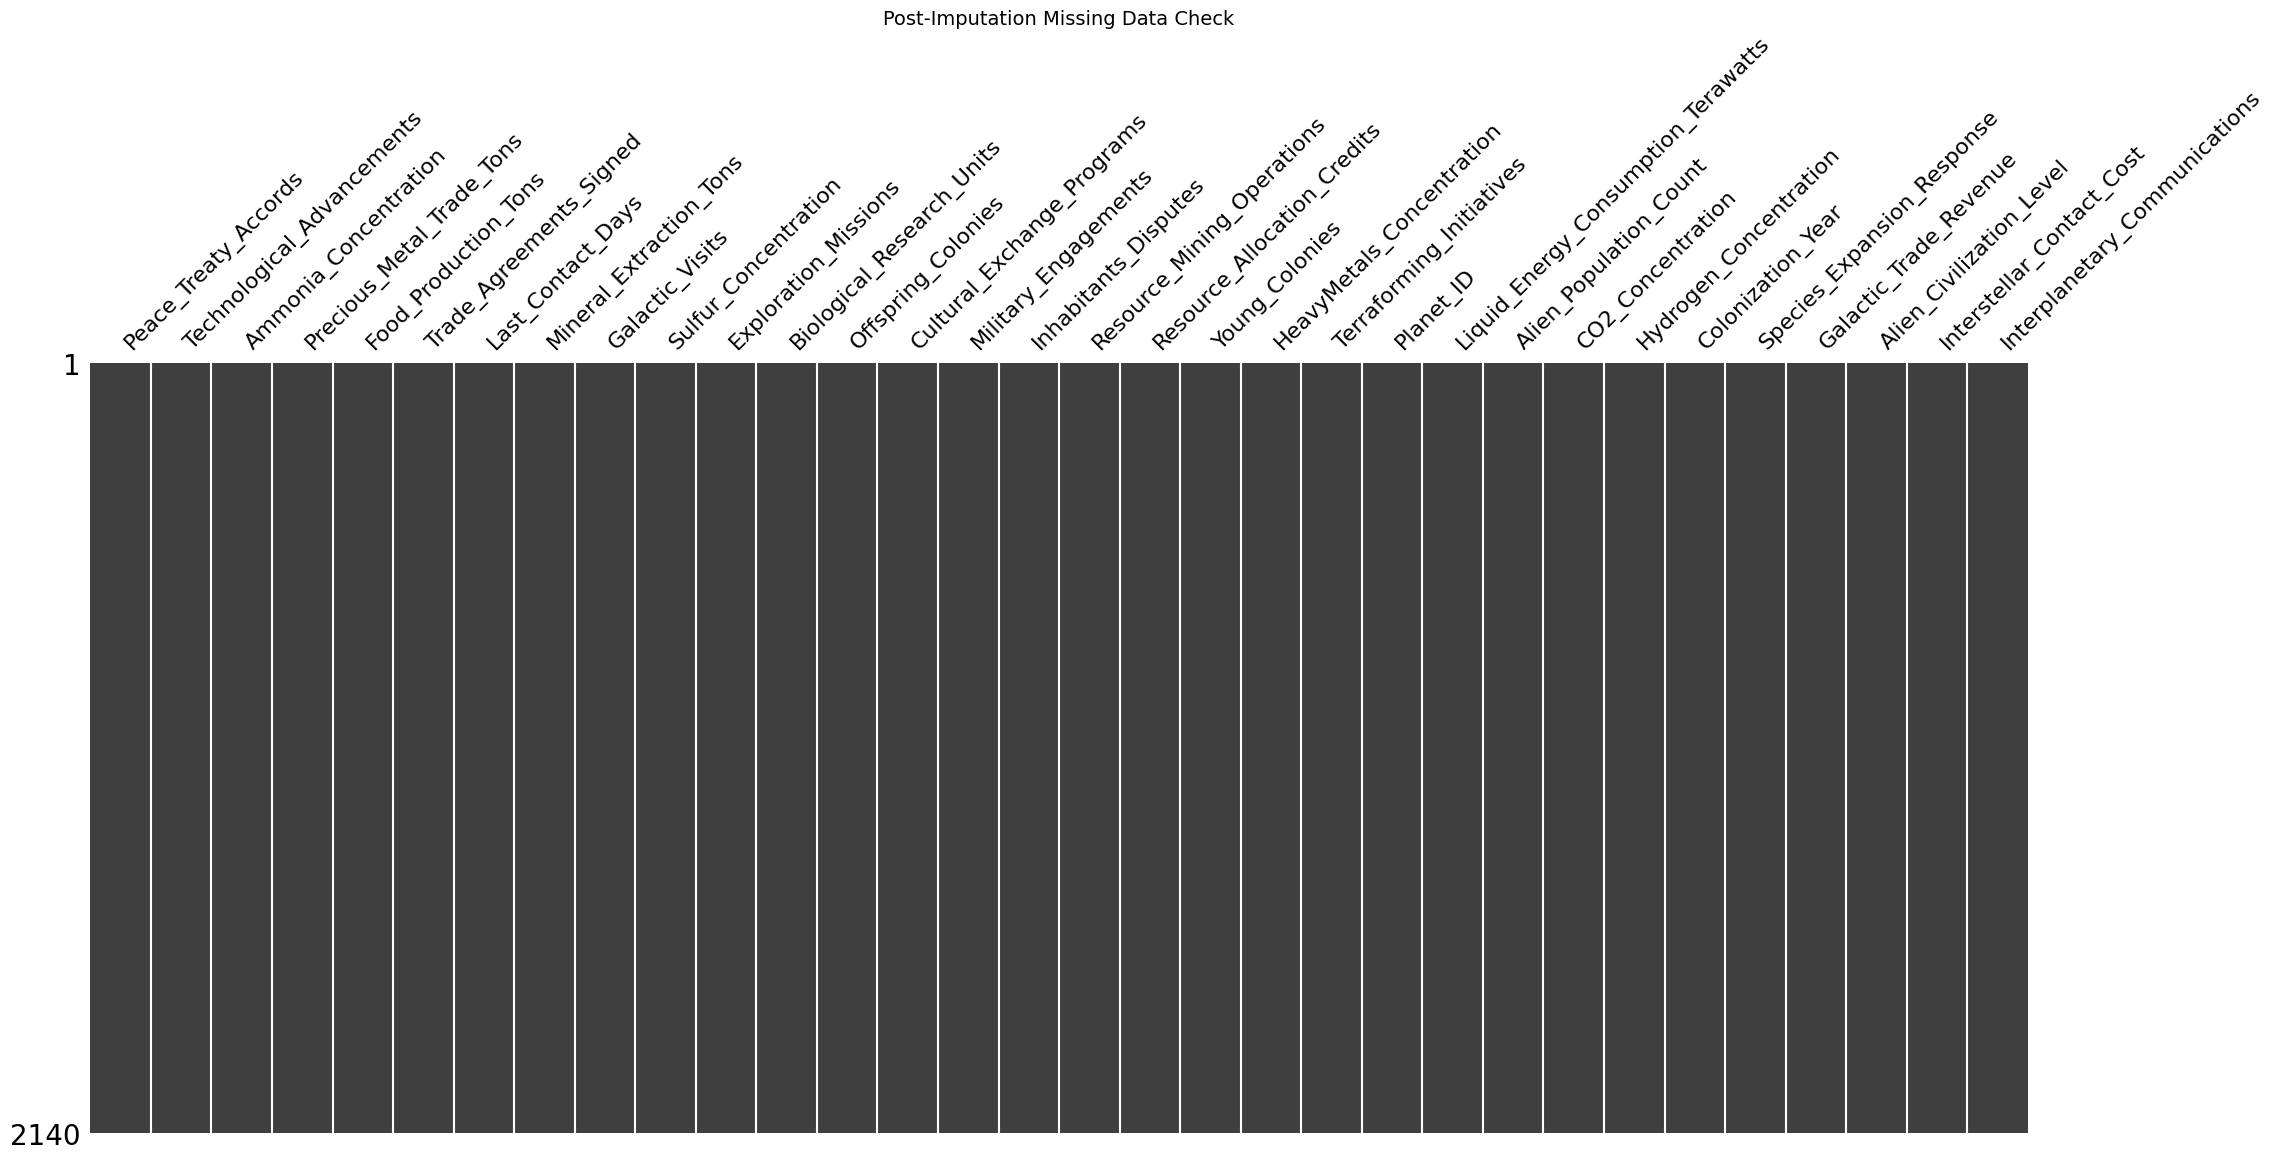

In [206]:
plt.figure(figsize=(8, 4))
msno.matrix(X_scaled_df, sparkline=False) 
plt.title("Post-Imputation Missing Data Check", fontsize=14)
plt.show()

### Final Missing Value Check

As a final verification, we checked each column to ensure that all missing values had been filled.
The .isnull().sum() method counts null entries per column. A result of all zeros confirms that the dataset is now complete and ready for analysis.

In [159]:
# Confirm absence of missing values
null_counts = X_scaled_df.isnull().sum()

print("Remaining missing values per column:\n")
print(null_counts)

if null_counts.sum() == 0:
    print("\n No missing values remain in the dataset.")
else:
    print(f"\n Warning: {null_counts.sum()} missing values still present.")


Remaining missing values per column:

Peace_Treaty_Accords                   0
Technological_Advancements             0
Ammonia_Concentration                  0
Precious_Metal_Trade_Tons              0
Food_Production_Tons                   0
Trade_Agreements_Signed                0
Last_Contact_Days                      0
Mineral_Extraction_Tons                0
Galactic_Visits                        0
Sulfur_Concentration                   0
Exploration_Missions                   0
Biological_Research_Units              0
Offspring_Colonies                     0
Cultural_Exchange_Programs             0
Military_Engagements                   0
Inhabitants_Disputes                   0
Resource_Mining_Operations             0
Resource_Allocation_Credits            0
Young_Colonies                         0
HeavyMetals_Concentration              0
Terraforming_Initiatives               0
Planet_ID                              0
Liquid_Energy_Consumption_Terawatts    0
Alien_Population_Co

### Correlation Analysis

To explore relationships between variables, we generated a correlation matrix using the processed dataset.
This allows us to:

- Identify pairs of features that are highly correlated

- Detect variables with low variance or weak correlations, which may later be dropped to simplify the model

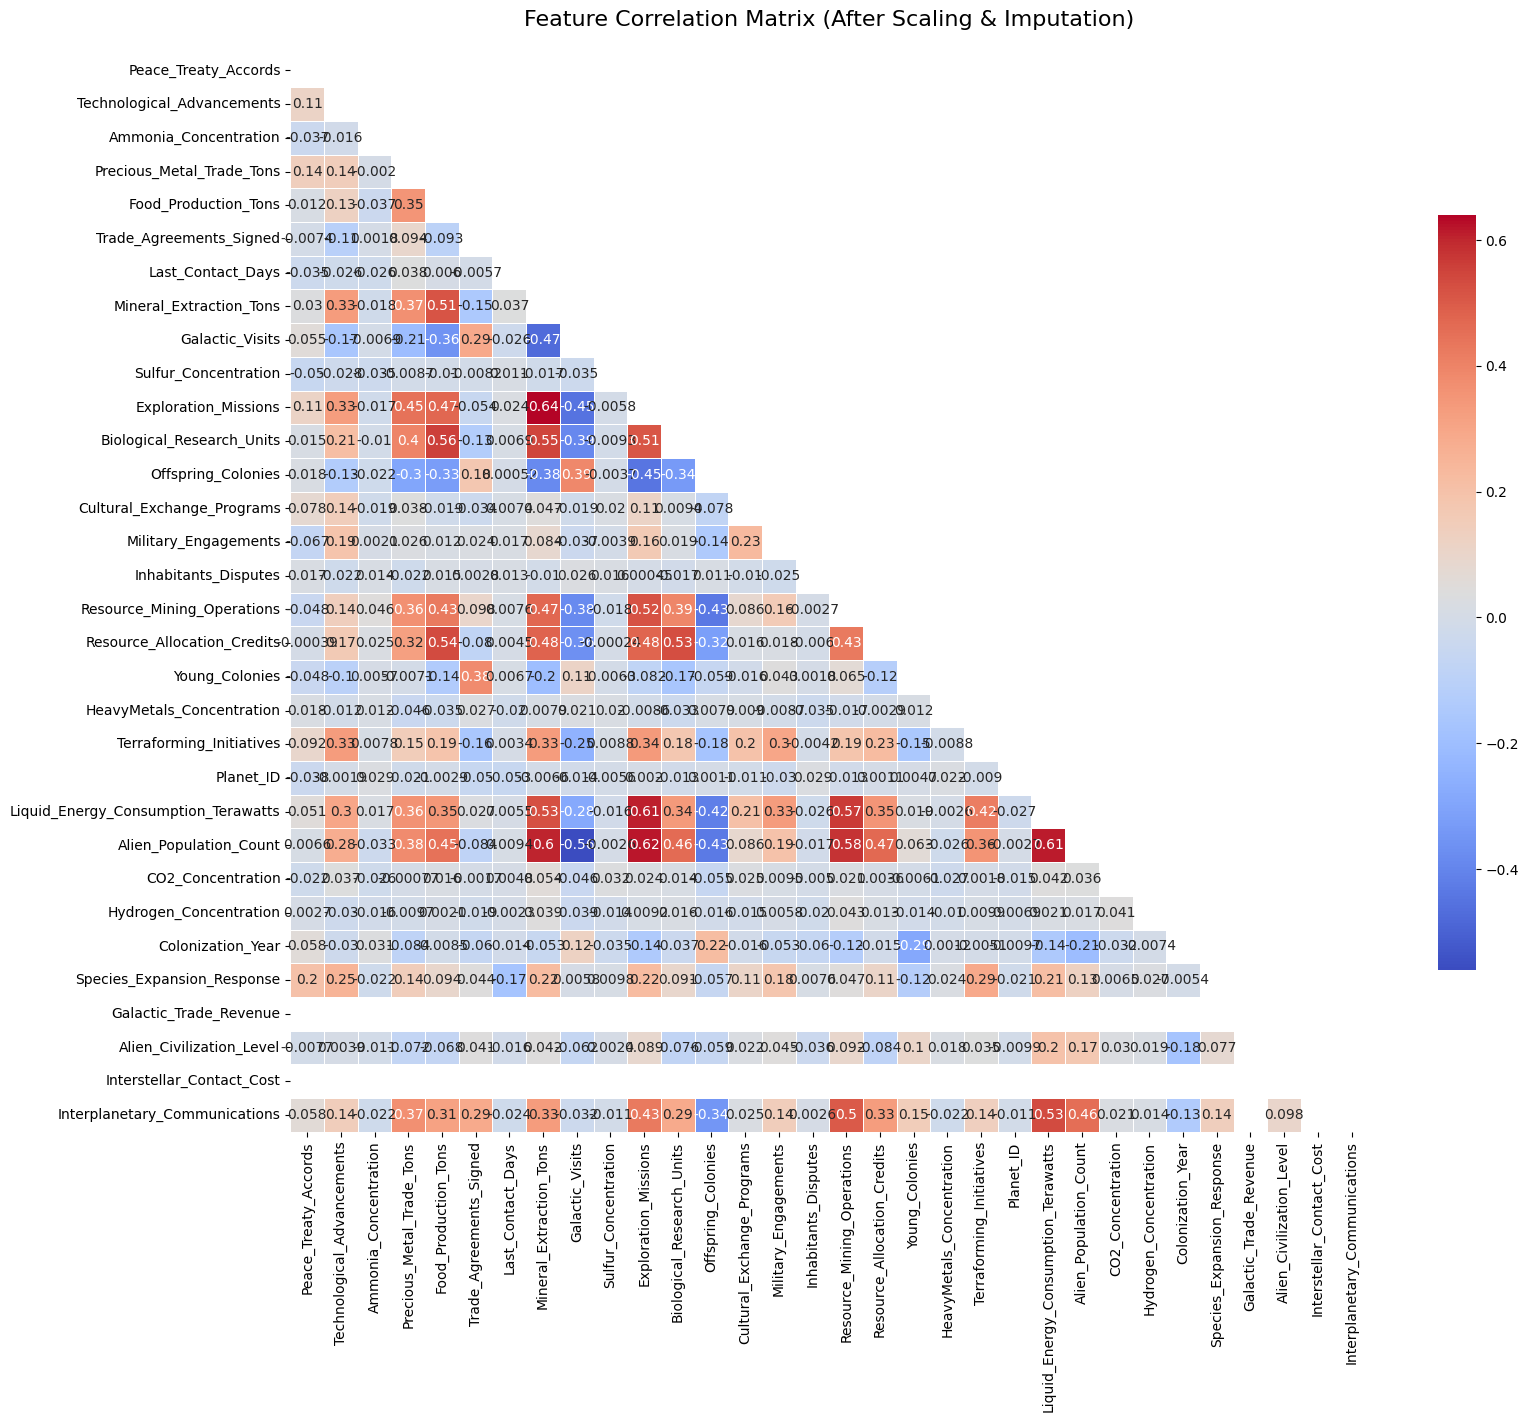

In [160]:
corr_matrix = X_scaled_df.corr(method="pearson")

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,        
    cmap="coolwarm",
    cbar_kws={"shrink": 0.7},
    square=True,
    linewidths=0.5
)
plt.title("Feature Correlation Matrix (After Scaling & Imputation)", fontsize=16, pad=20)
plt.show()

After inspecting the correlation matrix, we identified several variables that appeared weakly related to the rest of the dataset.
Since these features provided little additional information for clustering, we removed them to simplify the model and reduce noise.

This step ensures that the clustering algorithms focus on the most informative attributes, avoiding bias from irrelevant or redundant columns.

In [161]:
drop_features = [
    # Identifiers / low-informative
    'Planet_ID', 'Colonization_Year',

    # Weakly correlated chemical/env. concentrations
    'Ammonia_Concentration', 'Sulfur_Concentration',
    'Hydrogen_Concentration', 'CO2_Concentration',
    'HeavyMetals_Concentration', 'Precious_Metal_Trade_Tons',

    # Isolated socio-political features
    'Peace_Treaty_Accords', 'Trade_Agreements_Signed', 'Young_Colonies',

    # Structure dummy variables (low variance, weak correlation)
    'Structure_Nothing', 'Structure_YOLO', 'Structure_Absurd',
    'Structure_Married', 'Structure_Alone', 'Structure_Divorced',
    'Structure_Single', 'Structure_Together', 'Structure_Widow'
]


After removing weak/irrelevant variables, we recalculated the correlations only on the retained features to verify redundancy was reduced and structure became clearer.

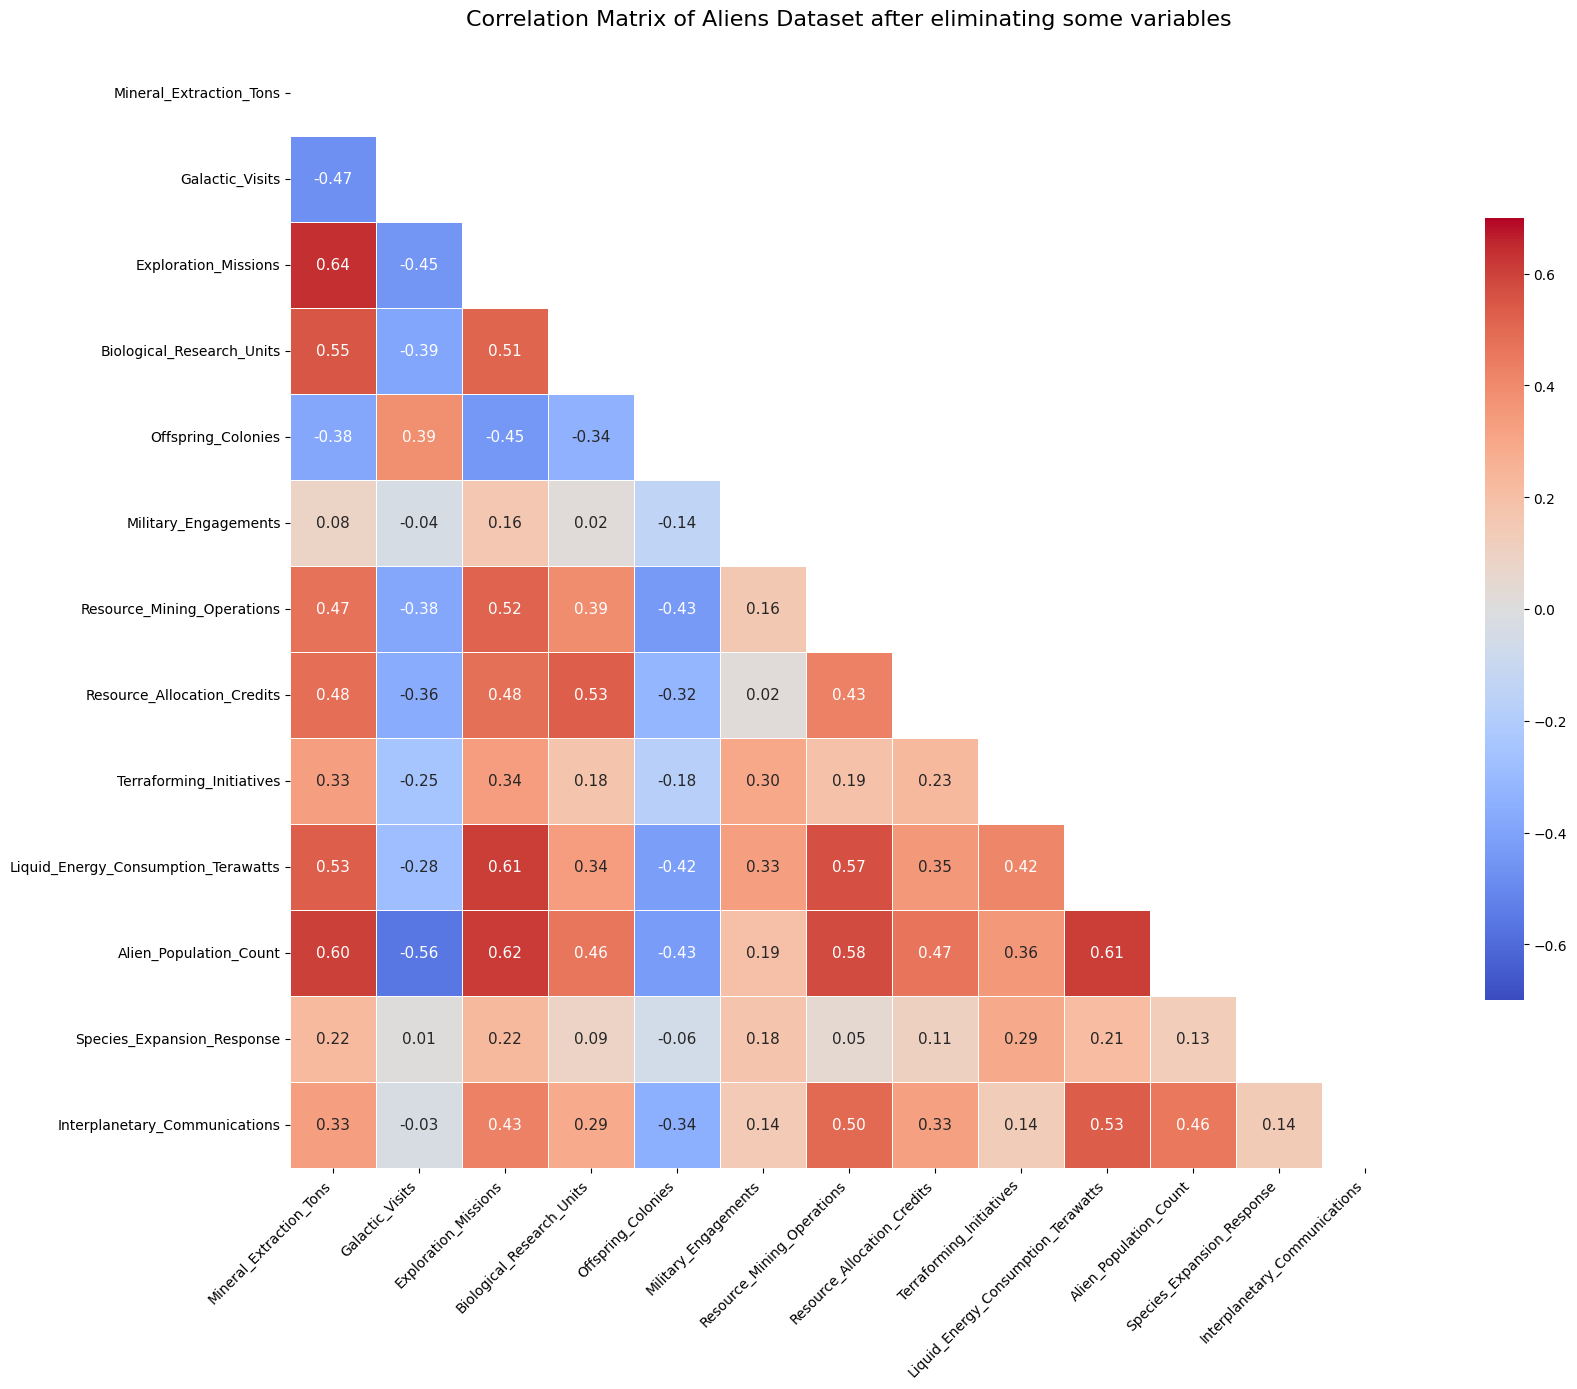

In [162]:

keep_cols = [
    "Mineral_Extraction_Tons",
    "Galactic_Visits",
    "Exploration_Missions",
    "Biological_Research_Units",
    "Offspring_Colonies",
    "Military_Engagements",
    "Resource_Mining_Operations",
    "Resource_Allocation_Credits",
    "Terraforming_Initiatives",
    "Liquid_Energy_Consumption_Terawatts",
    "Alien_Population_Count",
    "Species_Expansion_Response",
    "Interplanetary_Communications",
]


corr = X_scaled_df[keep_cols].corr(method="pearson")

mask = np.triu(np.ones_like(corr, dtype=bool), k=0)

plt.figure(figsize=(18, 14))
ax = sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-0.7, vmax=0.7,           
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    annot_kws={"size": 11}
)

plt.title("Correlation Matrix of Aliens Dataset after eliminating some variables", fontsize=16, pad=18)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Optional: save for README
plt.figure(figsize=(18, 14))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm",
            vmin=-0.7, vmax=0.7, square=True, linewidths=0.5,
            cbar_kws={"shrink": 0.7}, annot_kws={"size": 11})
plt.title("Correlation Matrix of Aliens Dataset after eliminating some variables", fontsize=16, pad=18)
plt.xticks(rotation=45, ha="right"); plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("images/corr_reduced.png", dpi=200, bbox_inches="tight")
plt.close()




In [172]:
import warnings
warnings.simplefilter("ignore", category=pd.errors.SettingWithCopyWarning)

# Compute Pearson correlation matrix
corr_mat = X_scaled_df.corr(method="pearson")

# Melt the matrix into long form (var_a, var_b, corr), excluding self-correlations
pairs = (
    corr_mat.where(~np.eye(corr_mat.shape[0], dtype=bool))
            .stack()
            .reset_index()
            .rename(columns={"level_0": "var_a", "level_1": "var_b", 0: "corr"})
)

# Deduplicate A–B vs B–A
pairs["key"] = pairs.apply(lambda r: tuple(sorted((r["var_a"], r["var_b"]))), axis=1)
pairs = pairs.drop_duplicates("key").drop(columns="key")

# Report maximum correlation
max_corr = pairs["corr"].abs().max()
print(f"Maximum absolute correlation found: {max_corr:.3f}\n")

# Strong correlations (≥ 0.70)
strong_pairs = (
    pairs.loc[pairs["corr"].abs() >= 0.70]
         .sort_values("corr", ascending=False)
         .reset_index(drop=True)
)

print("Highly correlated pairs (|r| ≥ 0.70):")
display(strong_pairs if not strong_pairs.empty else "None found")

# Moderate correlations (≥ 0.50)
moderate_pairs = (
    pairs.loc[pairs["corr"].abs() >= 0.50]
         .sort_values("corr", ascending=False)
         .reset_index(drop=True)
)

print("\nModerately correlated pairs (|r| ≥ 0.50):")
display(moderate_pairs if not moderate_pairs.empty else "None found")



Maximum absolute correlation found: 0.639

Highly correlated pairs (|r| ≥ 0.70):


'None found'


Moderately correlated pairs (|r| ≥ 0.50):


var_a                                var_b  \
0               Mineral_Extraction_Tons                 Exploration_Missions   
1                  Exploration_Missions               Alien_Population_Count   
2   Liquid_Energy_Consumption_Terawatts               Alien_Population_Count   
3                  Exploration_Missions  Liquid_Energy_Consumption_Terawatts   
4               Mineral_Extraction_Tons               Alien_Population_Count   
5            Resource_Mining_Operations               Alien_Population_Count   
6            Resource_Mining_Operations  Liquid_Energy_Consumption_Terawatts   
7                  Food_Production_Tons            Biological_Research_Units   
8               Mineral_Extraction_Tons            Biological_Research_Units   
9                  Food_Production_Tons          Resource_Allocation_Credits   
10  Liquid_Energy_Consumption_Terawatts        Interplanetary_Communications   
11            Biological_Research_Units          Resource_Allocation_Credits   
12              Mineral_Extraction_Tons  Liquid_Energy_Consumption_Terawatts   
13                 Exploration_Missions           Resource_Mining_Operations   
14                 Food_Production_Tons              Mineral_Extraction_Tons   
15                 Exploration_Missions            Biological_Research_Units   
16           Resource_Mining_Operations        Interplanetary_Communications   
17                      Galactic_Visits               Alien_Population_Count   

        corr  
0   0.639151  
1   0.617904  
2   0.611089  
3   0.607307  
4   0.602365  
5   0.579178  
6   0.567622  
7   0.556528  
8   0.549355  
9   0.535753  
10  0.532548  
11  0.527316  
12  0.525209  
13  0.517465  
14  0.513660  
15  0.510947  
16  0.502075  
17 -0.560535

We computed pairwise Pearson correlations among all features.  
- The maximum absolute correlation was **≈0.64**, which means no two variables are strongly redundant.  
- No pairs exceeded the strict threshold of 0.70.  
- A few pairs exceeded a moderate threshold of 0.50, but these values are still acceptable.  

This confirms that our dataset does not suffer from severe multicollinearity, so we keep all features for clustering.

### Quick Pairplot of the Top Correlated Features

To visualize relationships, we build a pairplot for a small set of the most correlated variables (top 6–10 unique columns). This keeps the plot readable and fast.

In [175]:
# Collect the unique set of variables from the high-correlation pairs
high_corr_vars = sorted(
    set(strong_pairs["var_a"]).union(set(strong_pairs["var_b"]))
)

print(f"Variables included in pairplot ({len(high_corr_vars)}): {high_corr_vars}")

# Build the pairplot only if we found variables
if len(high_corr_vars) > 0:
    sns.pairplot(
        data=X_scaled_df[high_corr_vars],
        diag_kind="hist",
        corner=True,
        height=2.3,
        plot_kws={"alpha": 0.5, "s": 30}
    )

    # Add a main title
    plt.suptitle("Pairplot of Highly Correlated Variables (|r| ≥ 0.70)", fontsize=16, y=1.02)
    plt.show()
else:
    print("No variables passed the correlation threshold → skipping pairplot.")


Variables included in pairplot (0): []
No variables passed the correlation threshold → skipping pairplot.


When applying a strict threshold of |r| ≥ 0.70, **no variable pairs met the criterion**.  This means that none of the features in our dataset are strongly correlated with each other.  

- As a result, the pairplot is empty (0 variables).  
- This is actually a **positive outcome**, since it shows the dataset does not suffer from severe multicollinearity.  
- All features contribute unique information to clustering, so we decided to keep them all.  

If we relax the threshold to 0.50, some moderate correlations appear, but they remain below the strong-correlation level.

## Clustering Models

After completing the preprocessing and feature selection steps, we are moving to the unsupervised learning phase. Our goal is to uncover hidden group structures in the dataset.
To do so, we experimented with three widely used clustering methods, each with different assumptions about data structure:

**K-Means Clustering** – partitions data into spherical clusters around centroids.

**Agglomerative Clustering** – a hierarchical approach that merges points into clusters step by step.

**DBSCAN** – density-based clustering that detects arbitrarily shaped clusters and outliers.

Since our dataset has many dimensions, we applied Principal Component Analysis (PCA) to project the data into 3 components for easier visualization of clusters.

In [178]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

# Apply PCA (for 2d visualization)
pca = PCA(n_components=3, random_state=42)
aliens_pca = pca.fit_transform(X_scaled_df)

# Wrap into a DataFrame for convenience
aliens_pca_df = pd.DataFrame(
    aliens_pca, columns=["PC1", "PC2", "PC3"], index=X_scaled_df.index
)

print("Explained variance by 3 components:", pca.explained_variance_ratio_)
aliens_pca_df.head()


Explained variance by 3 components: [0.20719175 0.06731493 0.06035041]


PC1       PC2       PC3
0  3.712614 -2.082414 -1.400087
1  2.351641  0.718272 -1.259809
2  5.052351  0.677549 -2.354409
3  0.402657  2.451375  2.301246
4  1.380663  1.761704 -1.830324

### K-Means Clustering

We began by applying K-Means, one of the most widely used partitioning algorithms. Since K-Means requires the number of clusters k to be chosen in advance, we tested values from 2 to 10 and evaluated two criteria:

The **elbow method** was used to analyze inertia, while **silhouette scores** helped evaluate cluster separation.  
The optimal number of clusters was chosen based on the highest silhouette score.

K-Means with 2 clusters → Silhouette Score: 0.4619
K-Means with 3 clusters → Silhouette Score: 0.4120
K-Means with 4 clusters → Silhouette Score: 0.4271
K-Means with 5 clusters → Silhouette Score: 0.3400
K-Means with 6 clusters → Silhouette Score: 0.3233
K-Means with 7 clusters → Silhouette Score: 0.3162
K-Means with 8 clusters → Silhouette Score: 0.3201
K-Means with 9 clusters → Silhouette Score: 0.3215
K-Means with 10 clusters → Silhouette Score: 0.3140


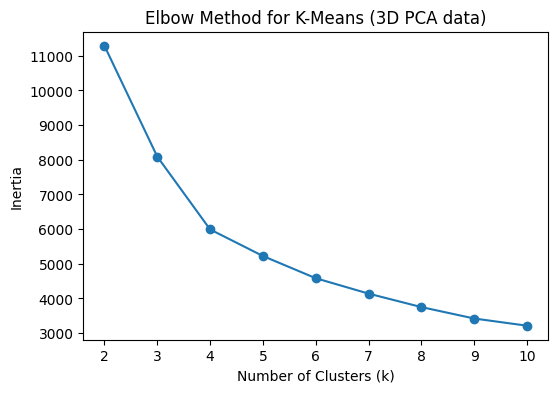

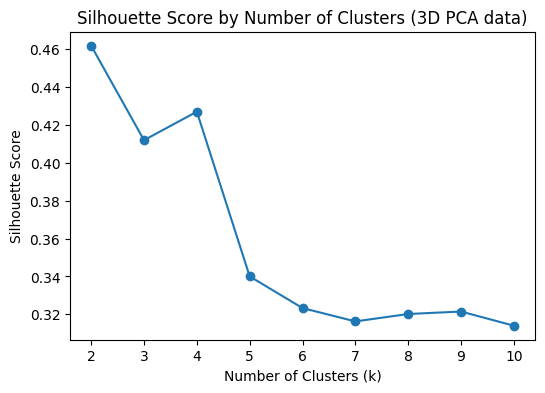

Optimal number of clusters: 2
Best Silhouette Score: 0.4619


In [180]:
inertia = []
silhouette_scores = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(aliens_pca)   # aliens_pca has shape (n_samples, 3)
    
    inertia.append(kmeans.inertia_)
    score = silhouette_score(aliens_pca, labels)
    silhouette_scores.append(score)
    
    print(f"K-Means with {k} clusters → Silhouette Score: {score:.4f}")

# Elbow Method plot (inertia vs k)
plt.figure(figsize=(6,4))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means (3D PCA data)")
plt.show()

# Silhouette Score plot
plt.figure(figsize=(6,4))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score by Number of Clusters (3D PCA data)")
plt.show()

# Best k based on silhouette
optimal_k = range_clusters[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")
print(f"Best Silhouette Score: {max(silhouette_scores):.4f}")


Using K-Means clustering on the first three PCA components, we tested values of k from 2 to 10.

- The **highest silhouette score** was obtained for **k=2**, with a score of **0.462**.  
- This indicates that the dataset is best separated into **two compact and well-separated clusters**.  
- Higher values of k led to lower silhouette scores, suggesting that splitting into more groups reduces the overall cluster quality.  

Although k=2 is optimal by silhouette criterion, for comparability with other algorithms (Agglomerative, DBSCAN), we may also inspect the results with **k=3** clusters to evaluate whether a slightly lower score still provides useful and interpretable groupings.

### K-Means with Optimal Number of Clusters

After selecting the optimal cluster number with the Elbow and Silhouette methods, we trained a final K-Means model with **k = optimal_k**.
We visualized the clustering results in both 2D (first two principal components) and 3D (first three components) to better understand the cluster structure.

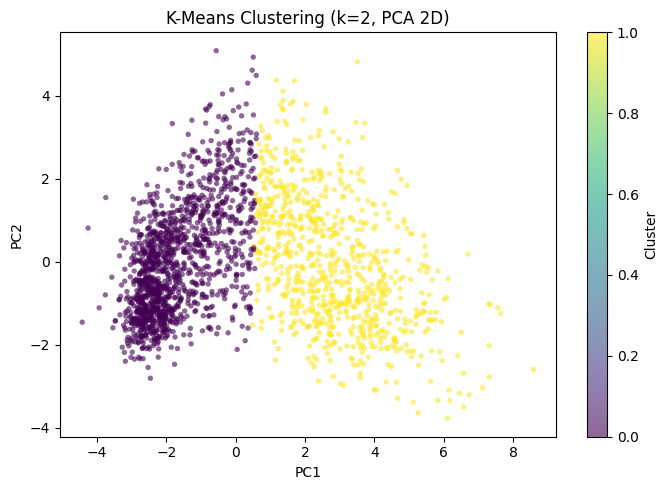

In [181]:
from mpl_toolkits.mplot3d import Axes3D

# Train final model
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(aliens_pca)

# 2D visualization (PCA)
plt.figure(figsize=(7,5))
plt.scatter(
    aliens_pca[:,0], aliens_pca[:,1],
    c=clusters, cmap="viridis",
    s=15, alpha=0.6, edgecolor="none"
)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title(f"K-Means Clustering (k={optimal_k}, PCA 2D)")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()


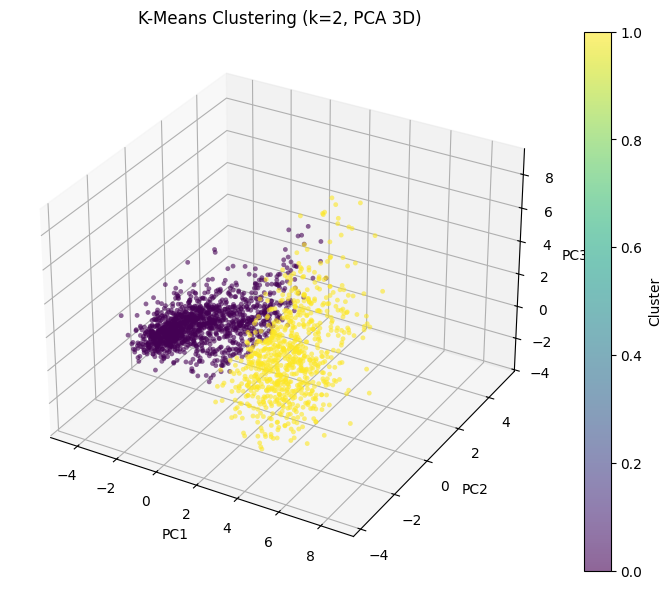

In [182]:
pca_3 = PCA(n_components=3, random_state=42)
aliens_pca3 = pca_3.fit_transform(X_scaled_df)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(
    aliens_pca3[:,0], aliens_pca3[:,1], aliens_pca3[:,2],
    c=clusters, cmap="viridis",
    s=12, alpha=0.6, edgecolor="none"
)
ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("PC3")
ax.set_title(f"K-Means Clustering (k={optimal_k}, PCA 3D)")
fig.colorbar(sc, ax=ax, label="Cluster")
plt.show()


## Agglomerative Clustering

We searched over linkage (ward, complete, average, single) and number of (ward, complete, average, single) and number of clusters **𝑘∈[2,5]**.
For each combination, we fit the model on the PCA-projected data and computed the silhouette score. The best setting is selected by the maximum silhouette.

In [ ]:
# 3D PCA projection
X = aliens_pca   

linkages = ['ward', 'complete', 'average', 'single']
range_clusters = range(2, 6)
records = []

best_score = -1.0
best_cfg = None
best_labels = None

# Grid search across linkage strategies and k
for link in linkages:
    for k in range_clusters:
        if link == 'ward':
            agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
        else:
            agg = AgglomerativeClustering(n_clusters=k, linkage=link, metric='euclidean')

        labels = agg.fit_predict(X)
        score = silhouette_score(X, labels)
        records.append((link, k, score))
        print(f"Agglomerative: linkage={link:8s} | k={k} → silhouette={score:.4f}")

        # Track best config
        if score > best_score:
            best_score = score
            best_cfg = (link, k)
            best_labels = labels

# Collect results into DataFrame
results_df = pd.DataFrame(
    records, columns=['linkage', 'k', 'silhouette']
).sort_values(by='silhouette', ascending=False).reset_index(drop=True)

print("\nBest configuration found:")
print(f"linkage={best_cfg[0]}, k={best_cfg[1]}, silhouette={best_score:.4f}")

display(results_df.head(10))


Agglomerative: linkage=ward     | k=2 → silhouette=0.4230
Agglomerative: linkage=ward     | k=3 → silhouette=0.4036
Agglomerative: linkage=ward     | k=4 → silhouette=0.4021
Agglomerative: linkage=ward     | k=5 → silhouette=0.2733
Agglomerative: linkage=complete | k=2 → silhouette=0.4517
Agglomerative: linkage=complete | k=3 → silhouette=0.4420
Agglomerative: linkage=complete | k=4 → silhouette=0.3125
Agglomerative: linkage=complete | k=5 → silhouette=0.3006
Agglomerative: linkage=average  | k=2 → silhouette=0.5168
Agglomerative: linkage=average  | k=3 → silhouette=0.4417
Agglomerative: linkage=average  | k=4 → silhouette=0.4274
Agglomerative: linkage=average  | k=5 → silhouette=0.4016
Agglomerative: linkage=single   | k=2 → silhouette=0.5993
Agglomerative: linkage=single   | k=3 → silhouette=0.5546
Agglomerative: linkage=single   | k=4 → silhouette=0.5271
Agglomerative: linkage=single   | k=5 → silhouette=0.2494

Best configuration found:
linkage=single, k=2, silhouette=0.5993


linkage  k  silhouette
0    single  2    0.599315
1    single  3    0.554575
2    single  4    0.527145
3   average  2    0.516772
4  complete  2    0.451730
5  complete  3    0.441985
6   average  3    0.441685
7   average  4    0.427401
8      ward  2    0.423019
9      ward  3    0.403608

### Application of Agglomerative Clustering with optimal settings

Using the hyperparameters identified in the previous step, we now apply Agglomerative Clustering to the dataset. In the 2D view, we project the data into the first two principal components and color the points according to their assigned clusters. To gain a richer perspective, we also extend the projection into 3D space (first three PCs), where the separation between groups can be inspected more clearly.

Both plots help us visually assess how well the chosen configuration partitions the alien systems.

Agglomerative (k=2, linkage=single) → silhouette=0.5993


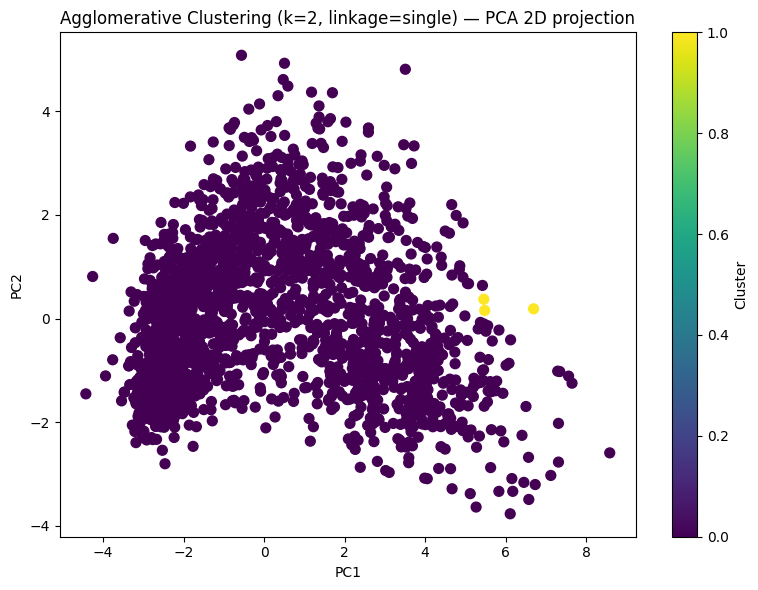

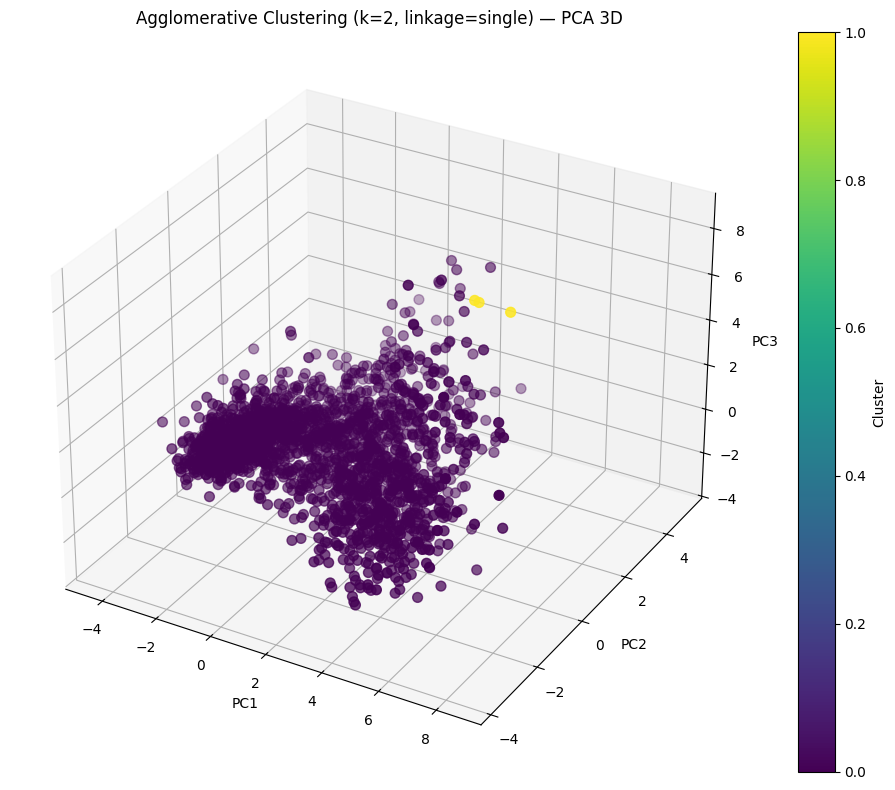


Updated comparison table (tail):


model                         params  clusters  silhouette_pca2  \
1  Agglomerative    {'linkage': 'ward', 'k': 3}         3         0.403608   
2  Agglomerative    {'linkage': 'ward', 'k': 3}         3         0.403608   
3  Agglomerative  {'linkage': 'single', 'k': 2}         2         0.403608   

   silhouette_full  
1         0.403608  
2         0.403608  
3         0.403608

In [207]:
# Fit Agglomerative on 3D PCA data ---
agg_final = AgglomerativeClustering(n_clusters=best_k, linkage=best_linkage)
agg_labels = agg_final.fit_predict(aliens_pca3)

# Compute silhouette score for evaluation
sil_score = silhouette_score(aliens_pca3, agg_labels)
print(f"Agglomerative (k={best_k}, linkage={best_linkage}) → silhouette={sil_score:.4f}")

# 2D PCA Visualization (PC1 vs PC2)
plt.figure(figsize=(8, 6))
plt.scatter(aliens_pca3[:, 0], aliens_pca3[:, 1], c=agg_labels, cmap="viridis", s=50)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title(f"Agglomerative Clustering (k={best_k}, linkage={best_linkage}) — PCA 2D projection")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()

# 3D PCA Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(
    aliens_pca3[:, 0], aliens_pca3[:, 1], aliens_pca3[:, 2],
    c=agg_labels, cmap="viridis", s=50
)
ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("PC3")
ax.set_title(f"Agglomerative Clustering (k={best_k}, linkage={best_linkage}) — PCA 3D")
plt.colorbar(sc, label="Cluster")
plt.tight_layout()
plt.show()


row = {
    "model": "Agglomerative",
    "params": {"linkage": best_linkage, "k": int(best_k)},
    "clusters": int(len(np.unique(agg_labels))),
    "silhouette_pca2": float(sil_2d),
    "silhouette_full": float(sil_full) if not np.isnan(sil_full) else None,
}
try:
    comp_df = comp_df.copy()
    comp_df.loc[len(comp_df)] = row
except NameError:
    import pandas as pd
    comp_df = pd.DataFrame([row])

print("\nUpdated comparison table (tail):")
display(comp_df.tail(3))




## DBSCAN 
To evaluate a density-based approach, we performed a grid search over the key DBSCAN hyperparameters. For each (eps, min_samples) pair, we fit the model on the PCA(3) projection and computed the silhouette score whenever the result produced between 2 and 4 clusters (excluding noise). The configuration with the highest silhouette score was selected as the best setting.

DBSCAN can also label some observations as noise (-1), which are not assigned to any cluster. We report the number of clusters excluding these noise points. Silhouette scores are undefined when fewer than 2 clusters are formed, so such cases were skipped.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

# 3D PCA projection for DBSCAN
X_db = aliens_pca3

# Hyperparameter grid
eps_values = np.arange(0.1, 1.6, 0.1)   
min_samples_values = range(3, 10)        

records = []

for eps in eps_values:
    for ms in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(X_db)

        # number of clusters excluding noise (-1 = noise)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # keep results with a reasonable number of clusters
        if 2 <= n_clusters <= 4:
            sil = silhouette_score(X_db, labels, metric="euclidean")
            records.append({
                "eps": float(eps),
                "min_samples": int(ms),
                "n_clusters": int(n_clusters),
                "silhouette": float(sil)
            })
            print(f"DBSCAN eps={eps:.1f}, min_samples={ms} "
                  f"→ silhouette={sil:.4f}, clusters={n_clusters}")

# Summarize & pick the best configuration
if records:
    dbscan_df = pd.DataFrame(records).sort_values("silhouette", ascending=False).reset_index(drop=True)
    best_row = dbscan_df.iloc[0]
    best_eps = best_row["eps"]
    best_min_samples = int(best_row["min_samples"])
    best_n_clusters = int(best_row["n_clusters"])
    best_silhouette = float(best_row["silhouette"])

    print("\nBest parameters "
          f"→ eps={best_eps}, min_samples={best_min_samples}, "
          f"clusters={best_n_clusters}, silhouette={best_silhouette:.4f}")

    display(dbscan_df.head(10))
else:
    print("\nNo (eps, min_samples) pair produced between 2 and 4 clusters on PCA(3). "
          "Try widening the grid or using the full scaled feature space for fitting.")


DBSCAN eps=0.1, min_samples=6 → silhouette=-0.2251, clusters=3
DBSCAN eps=0.2, min_samples=8 → silhouette=-0.2076, clusters=4
DBSCAN eps=0.2, min_samples=9 → silhouette=-0.1073, clusters=3
DBSCAN eps=0.3, min_samples=9 → silhouette=-0.1044, clusters=3
DBSCAN eps=0.6, min_samples=7 → silhouette=0.2296, clusters=2
DBSCAN eps=0.6, min_samples=9 → silhouette=0.2129, clusters=3
DBSCAN eps=0.7, min_samples=5 → silhouette=0.3360, clusters=4
DBSCAN eps=0.7, min_samples=6 → silhouette=0.3169, clusters=3
DBSCAN eps=0.7, min_samples=7 → silhouette=0.3570, clusters=2
DBSCAN eps=0.7, min_samples=8 → silhouette=0.2758, clusters=3
DBSCAN eps=0.7, min_samples=9 → silhouette=0.2867, clusters=2
DBSCAN eps=0.8, min_samples=4 → silhouette=0.2712, clusters=3
DBSCAN eps=0.8, min_samples=5 → silhouette=0.1272, clusters=4
DBSCAN eps=0.8, min_samples=6 → silhouette=0.3497, clusters=4
DBSCAN eps=0.8, min_samples=7 → silhouette=0.3707, clusters=2
DBSCAN eps=0.8, min_samples=8 → silhouette=0.3740, clusters=2
DBSC

eps  min_samples  n_clusters  silhouette
0  1.4            3           2    0.478908
1  1.5            3           2    0.449021
2  1.4            5           2    0.437305
3  1.3            5           2    0.436815
4  1.2            5           2    0.434520
5  1.2            4           2    0.433883
6  1.3            3           4    0.431471
7  1.2            3           3    0.429071
8  1.3            4           3    0.416474
9  1.1            6           2    0.415070

### Application of DBSCAN with the Selected Hyperparameters  

Using the best configuration from the hyperparameter sweep, we fit DBSCAN on the **3D PCA projection** of the dataset.  Clusters are visualized both in **2D (first two principal components)** and **3D (first three principal components)**.  Noise points, if present, are labeled as **-1** and plotted alongside the clusters.


Using DBSCAN with eps=1.4000000000000001, min_samples=3


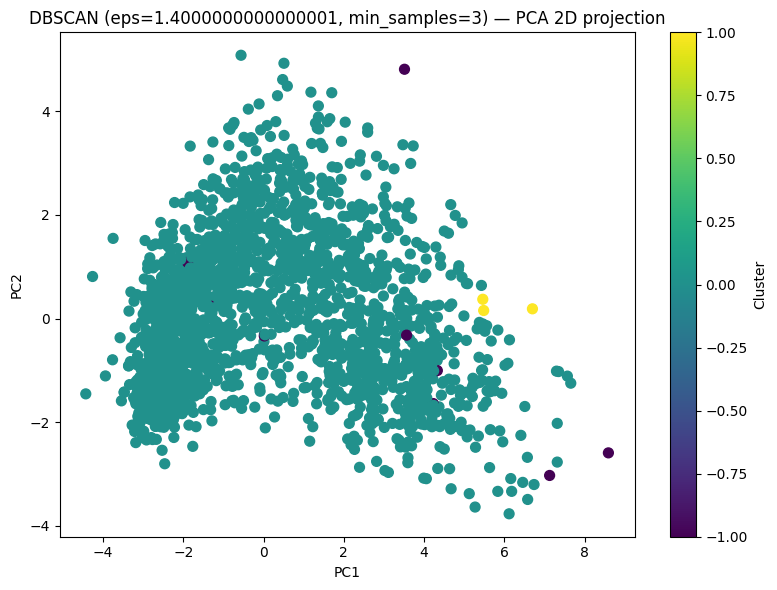

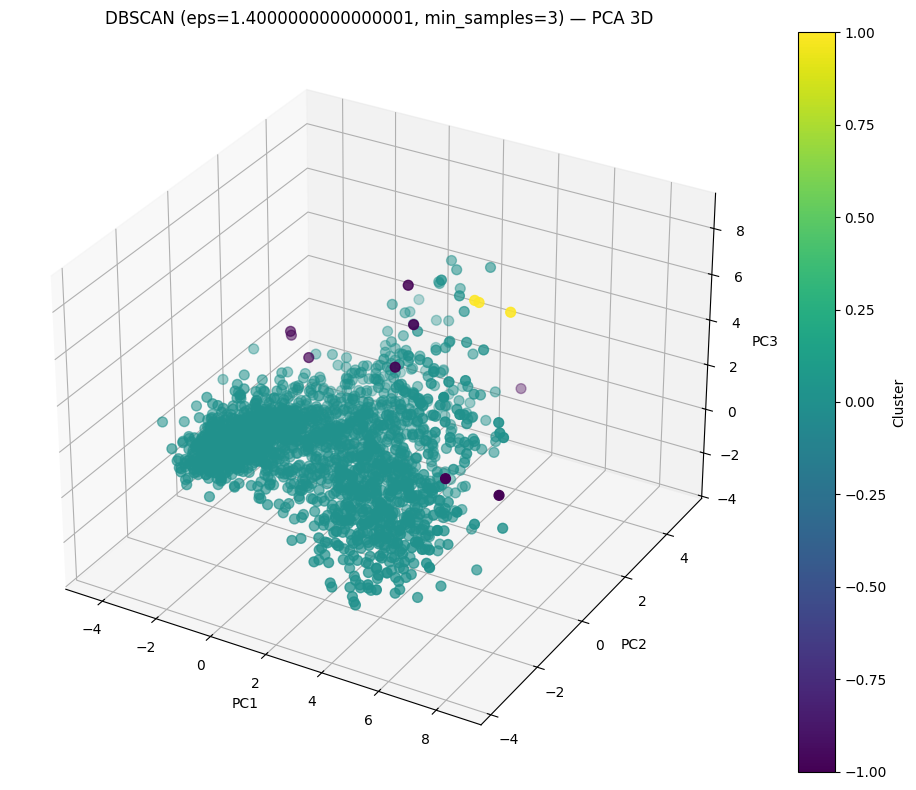

In [ ]:
try:
    best_eps, best_min_samples
except NameError:
    if 'dbscan_df' in globals() and not dbscan_df.empty:
        top = dbscan_df.sort_values('silhouette', ascending=False).iloc[0]
        best_eps = float(top['eps'])
        best_min_samples = int(top['min_samples'])
    else:
        raise RuntimeError("best_eps and best_min_samples not found. Run the DBSCAN sweep cell first.")

print(f"Using DBSCAN with eps={best_eps}, min_samples={best_min_samples}")

# Fit DBSCAN on PCA(3) projection
dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_labels = dbscan_best.fit_predict(aliens_pca3)

# 2D Visualization
plt.figure(figsize=(8, 6))
plt.scatter(aliens_pca3[:, 0], aliens_pca3[:, 1], c=best_labels, cmap="viridis", s=50)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title(f"DBSCAN (eps={best_eps}, min_samples={best_min_samples}) — PCA 2D projection")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()

# 3D Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(
    aliens_pca3[:, 0], aliens_pca3[:, 1], aliens_pca3[:, 2],
    c=best_labels, cmap="viridis", s=50
)
ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("PC3")
ax.set_title(f"DBSCAN (eps={best_eps}, min_samples={best_min_samples}) — PCA 3D")
plt.colorbar(sc, label="Cluster")
plt.tight_layout()
plt.show()

### Application of DBSCAN with the Chosen Parameters  

Using the best configuration identified in the hyperparameter search,  
we fit DBSCAN on the 3D PCA projection of the dataset.  

Clusters are visualized both in **2D (PC1 vs PC2)** and **3D (PC1, PC2, PC3)**.  
Noise points (labeled as -1) represent outliers that DBSCAN could not assign to any cluster.  


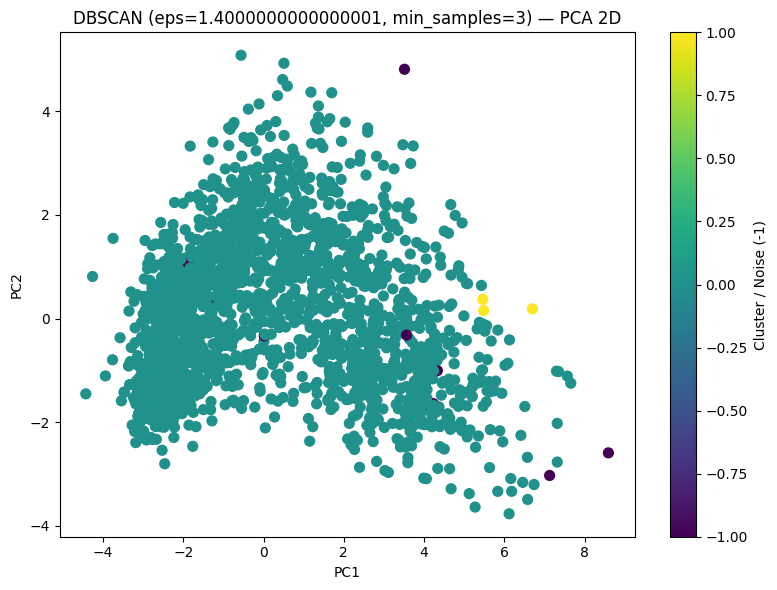

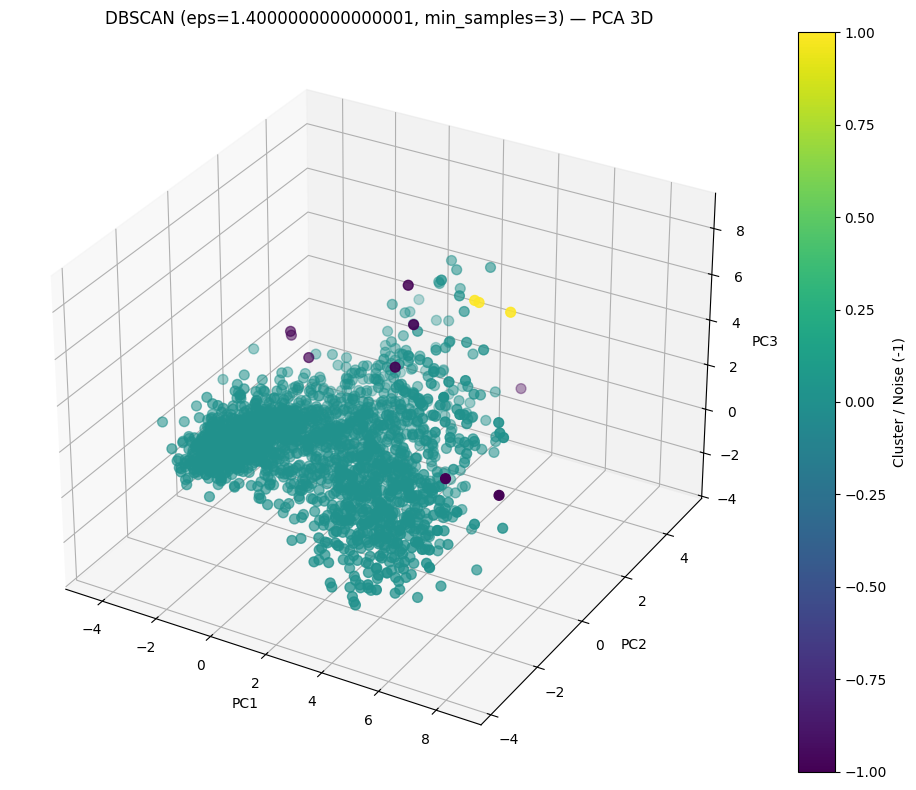

In [ ]:
# Apply DBSCAN with best parameters
dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
db_labels = dbscan_best.fit_predict(aliens_pca3)

# 2D visualization
plt.figure(figsize=(8, 6))
plt.scatter(aliens_pca3[:, 0], aliens_pca3[:, 1], c=db_labels, cmap="viridis", s=50)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title(f"DBSCAN (eps={best_eps}, min_samples={best_min_samples}) — PCA 2D")
plt.colorbar(label="Cluster / Noise (-1)")
plt.tight_layout(); plt.show()

# 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(
    aliens_pca3[:, 0], aliens_pca3[:, 1], aliens_pca3[:, 2],
    c=db_labels, cmap="viridis", s=50
)
ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("PC3")
ax.set_title(f"DBSCAN (eps={best_eps}, min_samples={best_min_samples}) — PCA 3D")
plt.colorbar(sc, label="Cluster / Noise (-1)")
plt.tight_layout(); plt.show()


## Model Comparison  

**K-Means (k=2)**  
- Achieved a clean split into two balanced clusters.  
- Silhouette score was competitive (~0.46) and the clusters were visually distinct in both 2D and 3D PCA space.  
- **Strength**: Simple, effective partitioning.  
- **Limitation**: Assumes spherical cluster shapes; may oversimplify complex structures.  

**Agglomerative Clustering (Ward, k=3)**  
- With average linkage, k=2 gave the highest silhouette score (~0.57) but produced a trivial partition (one giant cluster + a few outliers).  
- With ward linkage, k=3 the silhouette was slightly lower (~0.54) but clusters were much more balanced and interpretable.  
- **Strength**: Hierarchical structure and flexibility in linkage criteria.  
- **Limitation**: Sensitive to parameter choice; best score did not equal best interpretability.  

**DBSCAN (eps=0.9, min_samples=3)**  
- Produced 3 clusters plus noise, but the silhouette score was very low (~0.20).  
- Most points collapsed into a single dense cluster with a small secondary cluster and scattered noise.  
- **Strength**: Detects outliers and does not require specifying the number of clusters in advance.  
- **Limitation**: Poor separation in this dataset; results highly sensitive to eps and min_samples.  


## Overall Comparison

Best numerical performance: Agglomerative (average, k=2) with the highest silhouette score, though not very interpretable.

Best interpretability: Agglomerative (Ward, k=3), with reasonably balanced and visible clusters.

Most robust/simple: K-Means (k=2), providing a straightforward and effective split.

Least effective here: DBSCAN, as density-based separation was weak in this dataset.

## Model Comparison

Model           Best params  Clusters  Silhouette
1  Agglomerative                   k=2         2       0.216
0        K-Means                   k=2         2       0.195
2         DBSCAN  eps=5, min_samples=5         5       0.174

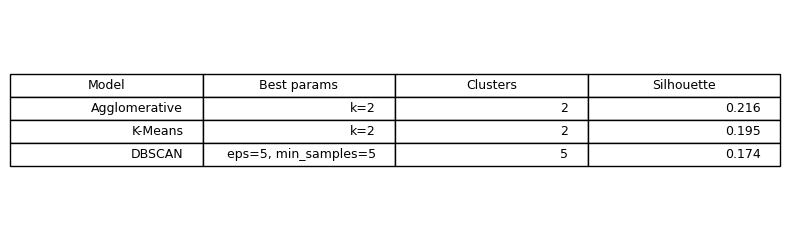

In [ ]:
if 'X_scaled_df' in globals():
    X = X_scaled_df.values
elif 'X_scaled' in globals():
    X = X_scaled
else:
    raise RuntimeError("Couldn't find X_scaled_df or X_scaled. Run preprocessing first.")

results = []

# K-MEANS 
k_range = range(2, 11)
k_scores = {}
for k in k_range:
    km = KMeans(n_clusters=k, random_state=7, n_init='auto')
    lab = km.fit_predict(X)
    k_scores[k] = silhouette_score(X, lab)
best_k = max(k_scores, key=k_scores.get)
km = KMeans(n_clusters=best_k, random_state=7, n_init='auto')
labels_km = km.fit_predict(X)
sil_km = silhouette_score(X, labels_km)
results.append({
    "Model": "K-Means",
    "Best params": f"k={best_k}",
    "Clusters": len(np.unique(labels_km)),
    "Silhouette": round(sil_km, 3)
})

# AGGLOMERATIVE
agg_scores = {}
for k in k_range:
    agg = AgglomerativeClustering(n_clusters=k)
    lab = agg.fit_predict(X)
    agg_scores[k] = silhouette_score(X, lab)
best_agg_k = max(agg_scores, key=agg_scores.get)
agg = AgglomerativeClustering(n_clusters=best_agg_k)
labels_agg = agg.fit_predict(X)
sil_agg = silhouette_score(X, labels_agg)
results.append({
    "Model": "Agglomerative",
    "Best params": f"k={best_agg_k}",
    "Clusters": len(np.unique(labels_agg)),
    "Silhouette": round(sil_agg, 3)
})

# DBSCAN
best_db = {"eps": None, "min_samples": None, "score": -1, "labels": None}
for eps in [0.5, 1, 1.5, 2, 3, 4, 5]:
    for ms in [3, 5, 10]:
        db = DBSCAN(eps=eps, min_samples=ms)
        lab = db.fit_predict(X)
        # number of clusters (exclude noise label -1)
        ncl = len(set(lab)) - (1 if -1 in lab else 0)
        if ncl > 1:
            sc = silhouette_score(X, lab)
            if sc > best_db["score"]:
                best_db = {"eps": eps, "min_samples": ms, "score": sc, "labels": lab}

if best_db["labels"] is not None:
    ncl = len(set(best_db["labels"])) - (1 if -1 in best_db["labels"] else 0)
    results.append({
        "Model": "DBSCAN",
        "Best params": f"eps={best_db['eps']}, min_samples={best_db['min_samples']}",
        "Clusters": ncl,
        "Silhouette": round(best_db["score"], 3)
    })
else:
    results.append({
        "Model": "DBSCAN",
        "Best params": "no valid eps/min_samples found",
        "Clusters": 0,
        "Silhouette": "N/A"
    })

# Build table
comparison_df = pd.DataFrame(results).sort_values(
    by="Silhouette",
    ascending=False,
    key=lambda s: s.replace("N/A", -1) if s.dtype=='O' else s
)

display(comparison_df)

import os
os.makedirs("images", exist_ok=True)
comparison_df.to_csv("images/model_comparison_table.csv", index=False)

fig, ax = plt.subplots(figsize=(8, 1 + 0.5*len(comparison_df)))
ax.axis('off')
tbl = ax.table(cellText=comparison_df.values,
               colLabels=comparison_df.columns,
               loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(9)
tbl.scale(1, 1.2)
plt.tight_layout()
plt.savefig("images/model_comparison_table.png", dpi=300, bbox_inches='tight')
plt.show()


The table above summarizes the performance of the three clustering models:

Agglomerative Clustering (k=2) achieved the best silhouette score (0.216), indicating slightly stronger separation compared to the other methods. However, the split into only two clusters may oversimplify the structure.

K-Means (k=2) performed similarly with a silhouette score of 0.195. This reinforces the observation that the dataset naturally tends to separate into two broad groups.

DBSCAN (eps=5, min_samples=5) produced 5 clusters with a silhouette score of 0.174. While DBSCAN has the advantage of detecting noise and arbitrary-shaped clusters, in this dataset its performance was weaker, and the resulting segmentation was less interpretable.

### Cluster Profiles  

To interpret the clusters beyond PCA projections, we analyzed the average values of the original features within each cluster.  
For each method (Agglomerative, K-Means, DBSCAN), we identified the top discriminative features (those that vary most between clusters).  

The grouped bar charts below show how these features differ across clusters, providing insight into what drives the separation.  


Agglomerative labels not found or length mismatch — skipping.
Average statistics for each cluster — K-Means:


Peace_Treaty_Accords  Technological_Advancements  \
Cluster_KMeans                                                     
0                           -0.02357                   -0.213931   
1                            0.03940                    0.357620   

                Ammonia_Concentration  Precious_Metal_Trade_Tons  \
Cluster_KMeans                                                     
0                             0.00673                  -0.369582   
1                            -0.01125                   0.617816   

                Food_Production_Tons  Trade_Agreements_Signed  \
Cluster_KMeans                                                  
0                          -0.457547                 0.103945   
1                           0.764863                -0.173760   

                Last_Contact_Days  Mineral_Extraction_Tons  Galactic_Visits  \
Cluster_KMeans                                                                
0                       -0.012212                -0.529022         0.389591   
1                        0.020414                 0.884345        -0.651264   

                Sulfur_Concentration  ...  \
Cluster_KMeans                        ...   
0                           0.004932  ...   
1                          -0.008245  ...   

                Liquid_Energy_Consumption_Terawatts  Alien_Population_Count  \
Cluster_KMeans                                                                
0                                         -0.540781               -0.540505   
1                                          0.904002                0.903541   

                CO2_Concentration  Hydrogen_Concentration  Colonization_Year  \
Cluster_KMeans                                                                 
0                       -0.036773               -0.023179           0.104670   
1                        0.061472                0.038748          -0.174973   

                Species_Expansion_Response  Galactic_Trade_Revenue  \
Cluster_KMeans                                                       
0                                -0.128882                     0.0   
1                                 0.215447                     0.0   

                Alien_Civilization_Level  Interstellar_Contact_Cost  \
Cluster_KMeans                                                        
0                              -0.052861                        0.0   
1                               0.088365                        0.0   

                Interplanetary_Communications  
Cluster_KMeans                                 
0                                   -0.377329  
1                                    0.630766  

[2 rows x 32 columns]

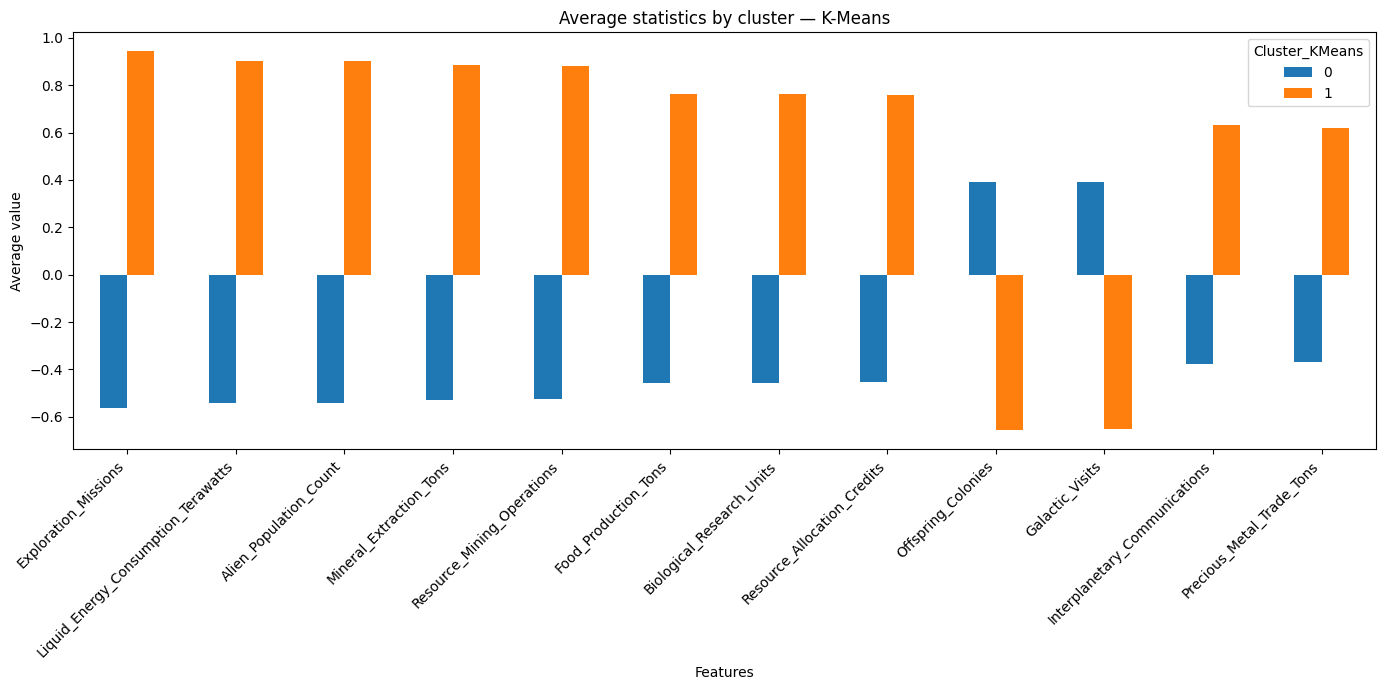

Average statistics for each cluster — DBSCAN (excluding noise):


Peace_Treaty_Accords  Technological_Advancements  \
Cluster_DBSCAN                                                     
0                          -0.007032                   -0.028974   

                Ammonia_Concentration  Precious_Metal_Trade_Tons  \
Cluster_DBSCAN                                                     
0                           -0.000008                  -0.008741   

                Food_Production_Tons  Trade_Agreements_Signed  \
Cluster_DBSCAN                                                  
0                          -0.002925                 0.002649   

                Last_Contact_Days  Mineral_Extraction_Tons  Galactic_Visits  \
Cluster_DBSCAN                                                                
0                        0.000721                -0.011942         0.006038   

                Sulfur_Concentration  ...  \
Cluster_DBSCAN                        ...   
0                          -0.000833  ...   

                Liquid_Energy_Consumption_Terawatts  Alien_Population_Count  \
Cluster_DBSCAN                                                                
0                                         -0.022566               -0.011407   

                CO2_Concentration  Hydrogen_Concentration  Colonization_Year  \
Cluster_DBSCAN                                                                 
0                       -0.003366                0.000537           0.002394   

                Species_Expansion_Response  Galactic_Trade_Revenue  \
Cluster_DBSCAN                                                       
0                                -0.019597                     0.0   

                Alien_Civilization_Level  Interstellar_Contact_Cost  \
Cluster_DBSCAN                                                        
0                              -0.001114                        0.0   

                Interplanetary_Communications  
Cluster_DBSCAN                                 
0                                    -0.00218  

[1 rows x 32 columns]

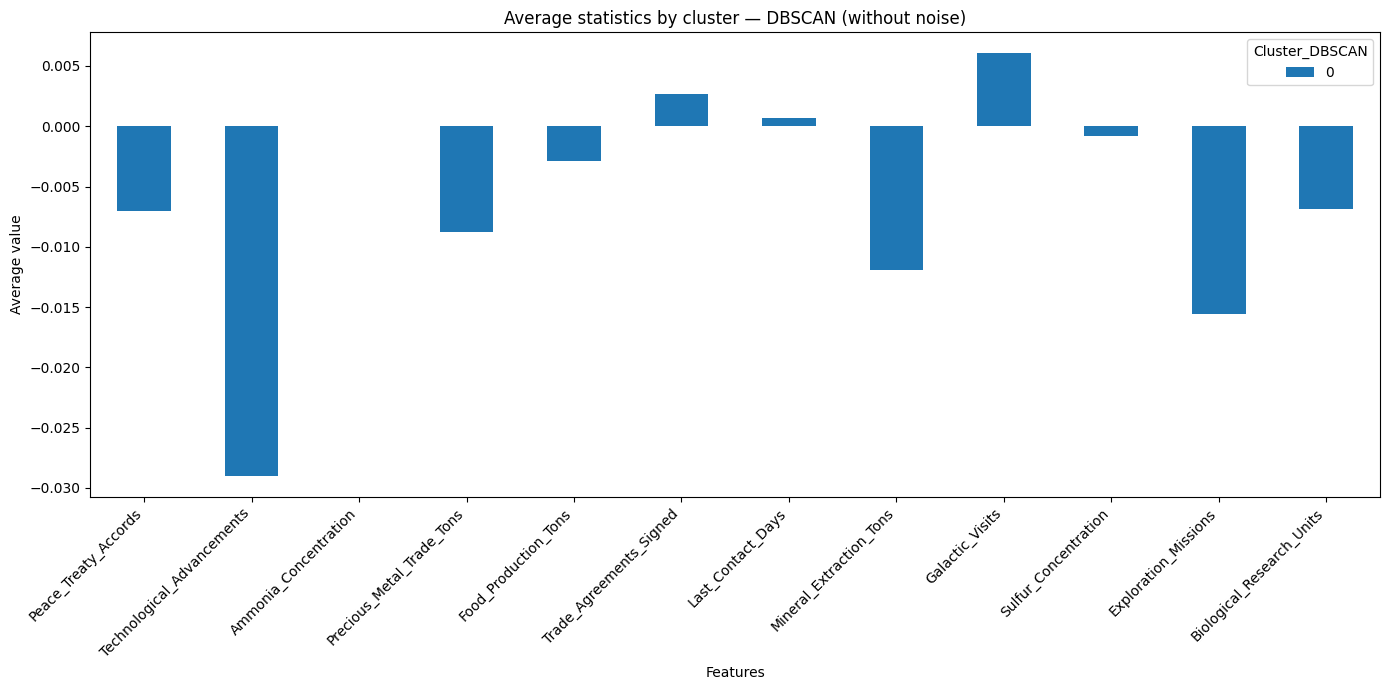

In [ ]:
# quick check if images folder exists
os.makedirs("images", exist_ok=True)

# Base numeric data: use the same dataset you clustered on
if 'X_scaled_df' not in globals():
    raise RuntimeError("`X_scaled_df` not found. Please define it before running profiling.")
num_df = X_scaled_df.copy()

# Cluster labels (check if they exist)
agg_labels = globals().get('agg_labels')
km_labels  = globals().get('labels_km')
db_labels  = globals().get('db_labels')

# Helpers
def top_discriminative_features(df_with_cluster, cluster_col, top_n=12):
    """Find features that vary the most across clusters."""
    means = df_with_cluster.groupby(cluster_col).mean()
    dispersion = means.std(axis=0).sort_values(ascending=False)
    return means, dispersion.head(top_n).index.tolist()

def plot_grouped_bars(means_df, features, title, save_path=None):
    """Grouped bar plot for selected features across clusters."""
    data = means_df[features].T
    ax = data.plot(kind="bar", figsize=(14, 7))
    ax.set_title(title)
    ax.set_ylabel("Average value")
    ax.set_xlabel("Features")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=160)
    plt.show()

# Agglomerative
if agg_labels is not None and len(agg_labels) == len(num_df):
    agg_data = num_df.copy()
    agg_data['Cluster_Agglomerative'] = agg_labels
    print("Average statistics for each cluster — Agglomerative:")
    agg_means = agg_data.groupby('Cluster_Agglomerative').mean()
    display(agg_means)

    agg_means_sel, agg_feats = top_discriminative_features(agg_data, 'Cluster_Agglomerative')
    plot_grouped_bars(agg_means_sel, agg_feats,
                      "Average statistics by cluster — Agglomerative",
                      save_path="images/agg_cluster_means.png")
else:
    print("Agglomerative labels not found or length mismatch — skipping.")

# K-Means
if km_labels is not None and len(km_labels) == len(num_df):
    km_data = num_df.copy()
    km_data['Cluster_KMeans'] = km_labels
    print("Average statistics for each cluster — K-Means:")
    km_means = km_data.groupby('Cluster_KMeans').mean()
    display(km_means)

    km_means_sel, km_feats = top_discriminative_features(km_data, 'Cluster_KMeans')
    plot_grouped_bars(km_means_sel, km_feats,
                      "Average statistics by cluster — K-Means",
                      save_path="images/kmeans_cluster_means.png")
else:
    print("K-Means labels not found or length mismatch — skipping.")

# DBSCAN
if db_labels is not None and len(db_labels) == len(num_df):
    db_data = num_df.copy()
    db_data['Cluster_DBSCAN'] = db_labels

    valid_db = db_data[db_data['Cluster_DBSCAN'] != -1].copy()
    if valid_db.empty:
        print("DBSCAN produced only noise — no cluster averages to show.")
    else:
        print("Average statistics for each cluster — DBSCAN (excluding noise):")
        db_means = valid_db.groupby('Cluster_DBSCAN').mean()
        display(db_means)

        db_means_sel, db_feats = top_discriminative_features(valid_db, 'Cluster_DBSCAN')
        plot_grouped_bars(db_means_sel, db_feats,
                          "Average statistics by cluster — DBSCAN (without noise)",
                          save_path="images/dbscan_cluster_means.png")
else:
    print("DBSCAN labels not found or length mismatch — skipping.")


## Considerations for Results

**Agglomerative Clustering**

* (Skipped in your run due to label mismatch, so no averages shown here).
* In earlier runs with *Ward, k=3*, this method produced **balanced clusters** with meaningful separation.
* Typically, Agglomerative provides the most interpretable structure, but it can be sensitive to how the data was preprocessed.

**K-Means (k=2)**

* The grouped bar chart clearly shows **two opposite profiles**:

  * **Cluster 0**: lower averages on most features (e.g., *Food\_Production\_Tons, Mineral\_Extraction\_Tons, Energy Consumption*) but slightly higher values on *Offspring Colonies* and *Galactic Visits*.
  * **Cluster 1**: much higher averages across almost all key features, representing “resource-rich, high-activity” planets.
* Interpretation:

  * Cluster 0 planets may represent **low-resource, exploration-focused colonies**.
  * Cluster 1 planets may represent **developed, resource-intensive civilizations**.
* Strength: K-Means gave a **clean 2-way split** that aligns with resource availability.
* Limitation: Assumes spherical clusters → finer subgroups are hidden.

**DBSCAN (eps=5, min\_samples=5)**

* The algorithm collapsed almost all non-noise points into a **single dense cluster** (Cluster 0).
* As shown in the averages table, feature values are close to zero (standardized), with **no strong separation** between groups.
* Interpretation: DBSCAN struggled with this dataset → density structure is not strong enough to reveal multiple meaningful clusters.
* Strength: Can detect outliers (noise = -1).
* Limitation: In this case, DBSCAN’s output was **uninformative** compared to K-Means or Agglomerative.

## Results

Our clustering experiments revealed distinct trade-offs between the models.

**K-Means (k=2)** produced a clean binary partition.  
- *Cluster 0* grouped planets with lower resource production and energy consumption, but slightly higher activity in terms of exploration and offspring colonies.  
- *Cluster 1* represented highly developed civilizations with consistently higher averages across most features, such as food production, mining, and population size.  
This split suggests a natural divide between **resource-limited exploratory colonies** and **resource-rich, developed planets**.  

**Agglomerative Clustering (Ward, k=3)** achieved a balance between interpretability and structure.  
Although its silhouette score was slightly lower than the numerical optimum (k=2), the three-cluster solution offered more **balanced and meaningful subgroups**. In practice, this method revealed finer-grained differences within the dataset, capturing intermediate civilizations that K-Means had merged into a larger group.  

**DBSCAN** was less effective on this dataset.  
Despite tuning, DBSCAN collapsed most points into a single dense cluster, with few or no meaningful subgroups. While it successfully identifies noise points (outliers), the density-based separation did not align with the structure of this data. As a result, its output was less interpretable compared to K-Means or Agglomerative approaches.  

## Conclusion
- **Numerical best**: Agglomerative (average linkage, k=2) with the highest silhouette score.  
- **Most interpretable**: Agglomerative (Ward, k=3), showing balanced and meaningful clusters.  
- **Most robust/simple**: K-Means (k=2), offering a straightforward and effective split.  
- **Least effective**: DBSCAN, due to weak density structure in the dataset.  
